## *0. environment*

### 0.1 python environment

#### 0.1.1 install python dependency

In [2]:
!pip3 install torch
!pip3 install numpy
!pip3 install xgboost
!pip3 install seaborn
!pip3 install catboost
!pip3 install torchvision

You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 18.1, however version 19.2.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


#### 0.1.2 import the library

In [3]:
import os
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d
from scipy import stats
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from catboost import CatBoostRegressor

### 0.4 change to the work path

In [4]:
root_file_path = "/home/extension/kaggle/IEEE-CIS_Fraud_Detection"

In [5]:
os.chdir(root_file_path)

### 0.5 unzip the files and read

#### 0.5.1 training set

In [6]:
!ls

sample_submission.csv.zip  train_identity.csv	   train_transaction.csv.zip
test_identity.csv.zip	   train_identity.csv.zip
test_transaction.csv.zip   train_transaction.csv


In [7]:
train_transcation_set = pd.read_csv("train_transaction.csv")

In [8]:
train_transcation_set.head(5)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ... V330  V331  V332  V333  V334 V335  \
0    NaN  150.0    discover  142.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
1  404.0  150.0  mastercard  102.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
2  490.0  150.0        visa  166.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
3  567.0  150.0  mastercard  117.0  ...  NaN   NaN   NaN   NaN   NaN  NaN   
4  514.0  150.0  mastercard  102.0  ...  0.0   0.0   0.0   0.0   0.0  0.0   

  V336  V337  V338  V339  
0  NaN   NaN   NaN   NaN  
1  NaN   NaN   NaN   NaN  
2  NaN   NaN   NaN   NaN  
3  NaN   NaN   NaN   NaN  
4  0.0   0.0   0.0   0.0  

[5 rows x 394 columns]

In [9]:
train_identity_set = pd.read_csv("train_identity.csv")

In [10]:
train_identity_set.head(5)

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN    NaN   
1        2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN    NaN   
2        2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN    NaN   
3        2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN    NaN   
4        2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN    NaN   

   id_09  ...                id_31  id_32      id_33           id_34  id_35  \
0    NaN  ...  samsung browser 6.2   32.0  2220x1080  match_status:2      T   
1    NaN  ...   mobile safari 11.0   32.0   1334x750  match_status:1      T   
2    0.0  ...          chrome 62.0    NaN        NaN             NaN      F   
3    NaN  ...          chrome 62.0    NaN        NaN             NaN      F   
4    0.0  ...          chrome 62.0   24.0   1280x800  match_status:2      T   

  id_36 id_37  id_38  DeviceType                     DeviceInfo  
0     F     T      T      mobile  SAMSUNG SM-G892A Build/NRD90M  
1     F     F      T      mobile                     iOS Device  
2     F     T      T     desktop                        Windows  
3     F     T      T     desktop                            NaN  
4     F     T      T     desktop                          MacOS  

[5 rows x 41 columns]

#### 0.5.2 test set

In [11]:
test_transaction_set = pd.read_csv("test_transaction.csv.zip")

In [12]:
test_transaction_set.head(5)

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3663549       18403224           31.95         W  10409  111.0   
1        3663550       18403263           49.00         W   4272  111.0   
2        3663551       18403310          171.00         W   4476  574.0   
3        3663552       18403310          284.95         W  10989  360.0   
4        3663553       18403317           67.95         W  18018  452.0   

   card3       card4  card5  card6  ...  V330  V331  V332  V333 V334 V335  \
0  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
1  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
2  150.0        visa  226.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
3  150.0        visa  166.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   
4  150.0  mastercard  117.0  debit  ...   NaN   NaN   NaN   NaN  NaN  NaN   

   V336  V337  V338  V339  
0   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN  

[5 rows x 393 columns]

In [13]:
test_identity_set = pd.read_csv("test_identity.csv.zip")

In [14]:
test_identity_set.head(5)

TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  id_08  \
0        3663586  -45.0  280290.0    NaN    NaN    0.0    0.0    NaN    NaN   
1        3663588    0.0    3579.0    0.0    0.0    0.0    0.0    NaN    NaN   
2        3663597   -5.0  185210.0    NaN    NaN    1.0    0.0    NaN    NaN   
3        3663601  -45.0  252944.0    0.0    0.0    0.0    0.0    NaN    NaN   
4        3663602  -95.0  328680.0    NaN    NaN    7.0  -33.0    NaN    NaN   

   id_09  ...                    id_31  id_32     id_33           id_34  \
0    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   
1    0.0  ...  chrome 67.0 for android   24.0  1280x720  match_status:2   
2    NaN  ...       ie 11.0 for tablet    NaN       NaN             NaN   
3    0.0  ...  chrome 67.0 for android    NaN       NaN             NaN   
4    NaN  ...  chrome 67.0 for android    NaN       NaN             NaN   

   id_35 id_36 id_37  id_38  DeviceType                   DeviceInfo  
0      F     F     T      F      mobile  MYA-L13 Build/HUAWEIMYA-L13  
1      T     F     T      T      mobile         LGLS676 Build/MXB48T  
2      F     T     T      F     desktop                  Trident/7.0  
3      F     F     T      F      mobile  MYA-L13 Build/HUAWEIMYA-L13  
4      F     F     T      F      mobile         SM-G9650 Build/R16NW  

[5 rows x 41 columns]

## *2. feature engineering*

In [15]:
train_transcation_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590540 entries, 0 to 590539
Columns: 394 entries, TransactionID to V339
dtypes: float64(376), int64(4), object(14)
memory usage: 1.7+ GB


In [16]:
train_identity_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144233 entries, 0 to 144232
Data columns (total 41 columns):
TransactionID    144233 non-null int64
id_01            144233 non-null float64
id_02            140872 non-null float64
id_03            66324 non-null float64
id_04            66324 non-null float64
id_05            136865 non-null float64
id_06            136865 non-null float64
id_07            5155 non-null float64
id_08            5155 non-null float64
id_09            74926 non-null float64
id_10            74926 non-null float64
id_11            140978 non-null float64
id_12            144233 non-null object
id_13            127320 non-null float64
id_14            80044 non-null float64
id_15            140985 non-null object
id_16            129340 non-null object
id_17            139369 non-null float64
id_18            45113 non-null float64
id_19            139318 non-null float64
id_20            139261 non-null float64
id_21            5159 non-null float64
id_2

In [17]:
train_transcation_set.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

### 2.1 merge sets

In [18]:
df_train = pd.merge(train_transcation_set, train_identity_set, how="left", on=["TransactionID"])

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 590539
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 1.9+ GB


### 2.2 nan

In [41]:
print(type(df_train["DeviceType"].dtype))

<class 'numpy.dtype'>


In [30]:
null_df = df_train.isnull()

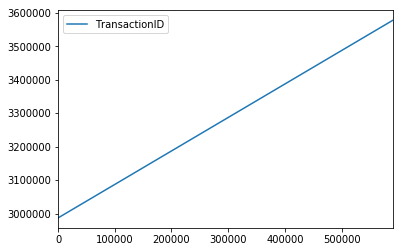

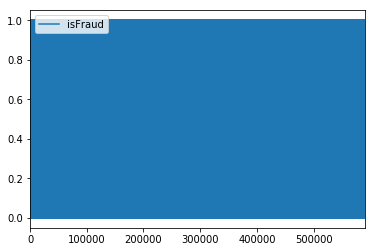

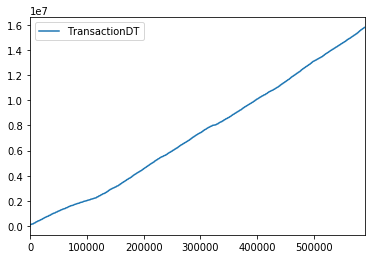

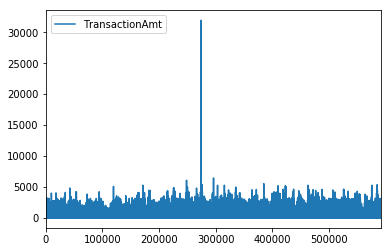

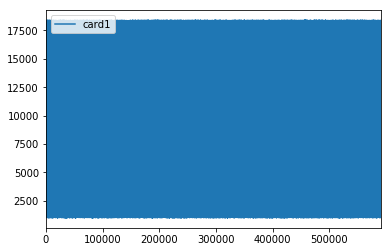

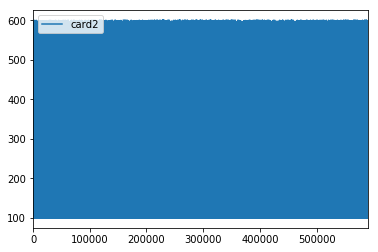

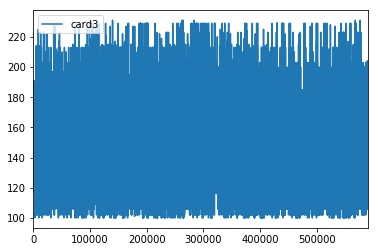

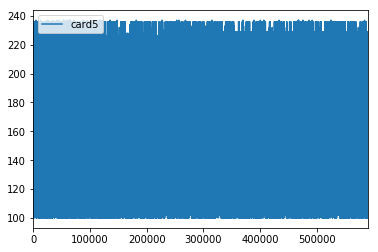

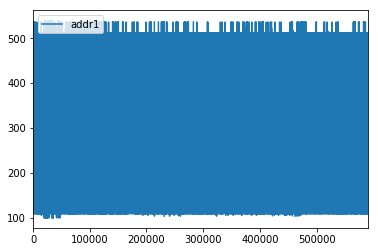

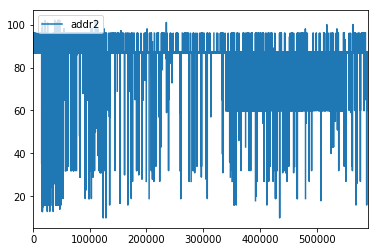

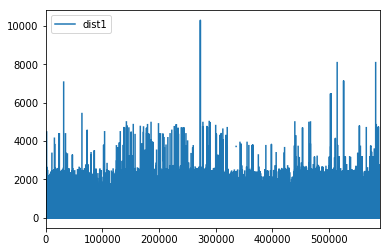

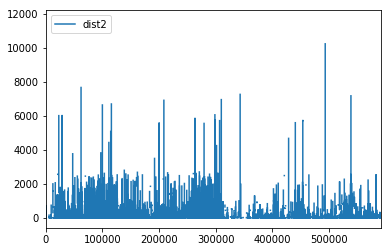

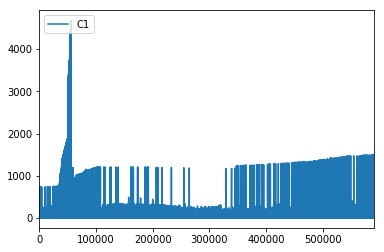

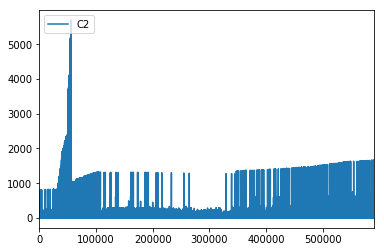

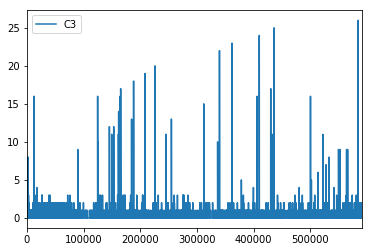

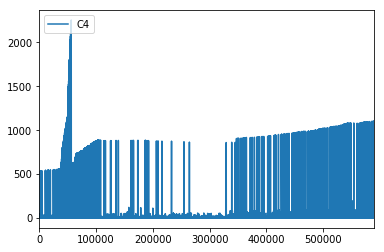

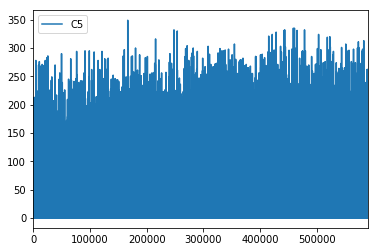

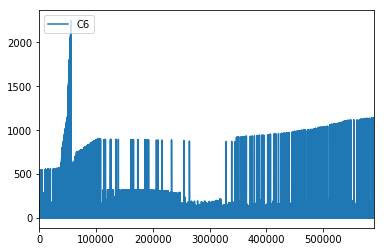

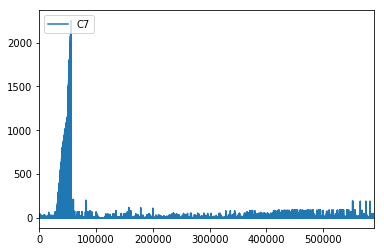

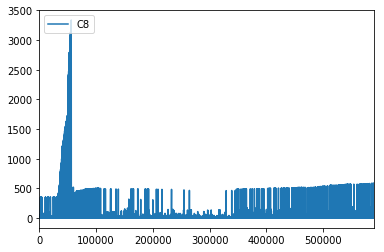

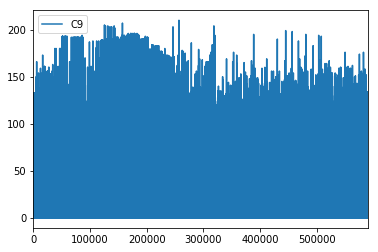

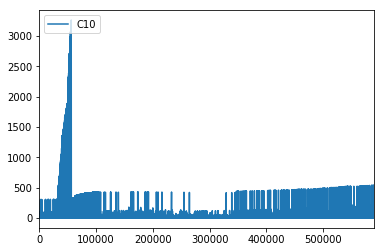

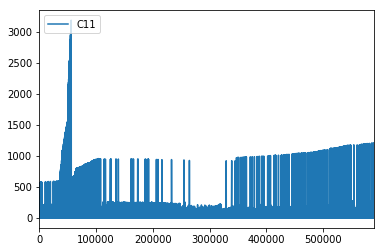

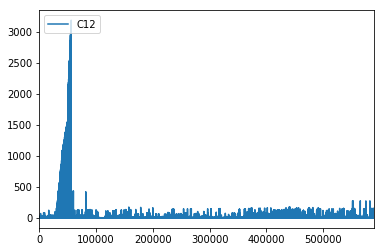

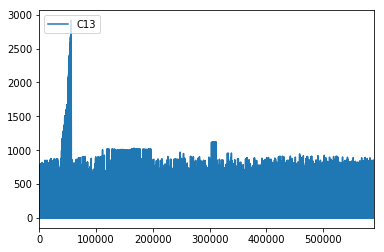

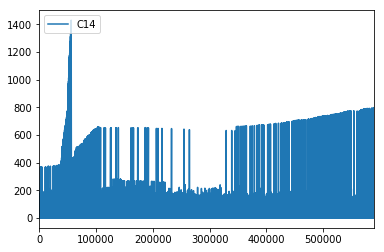

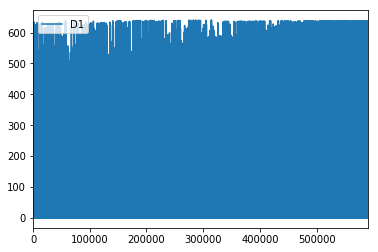

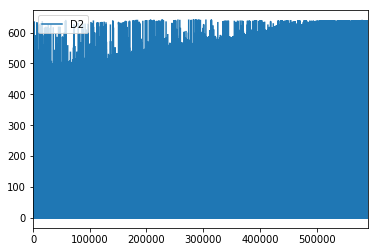

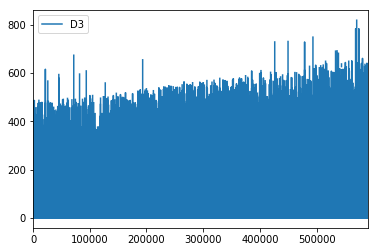

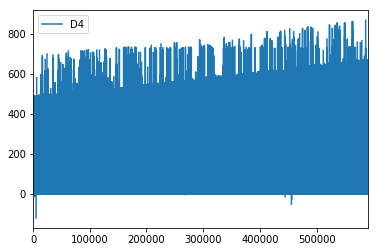

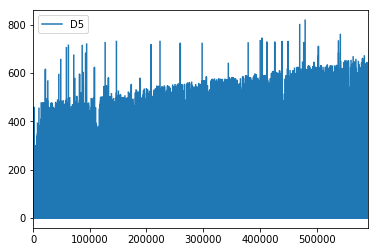

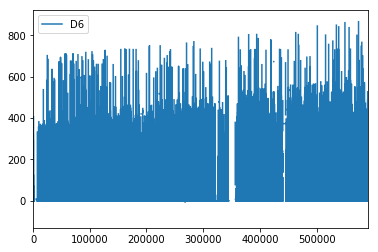

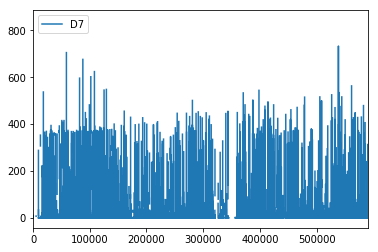

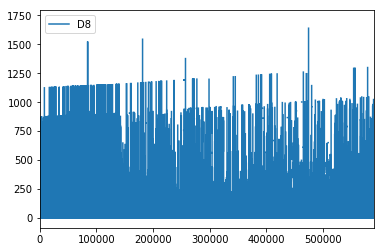

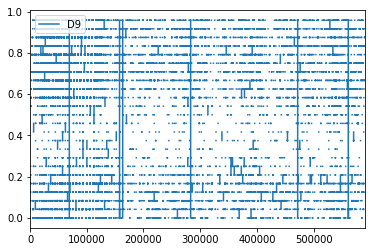

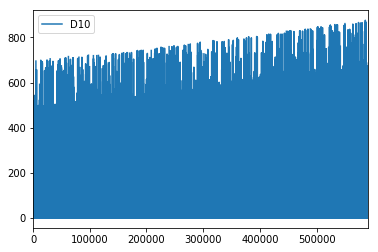

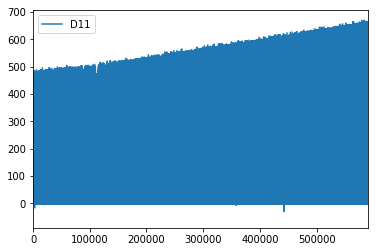

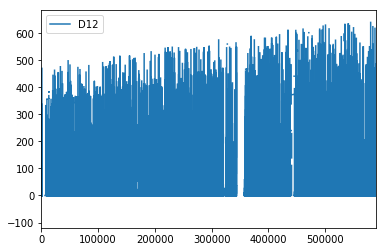

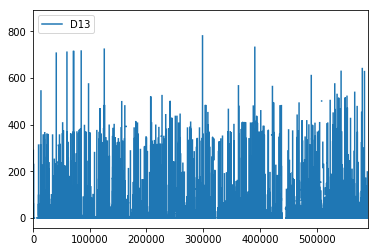

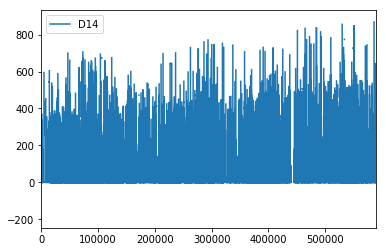

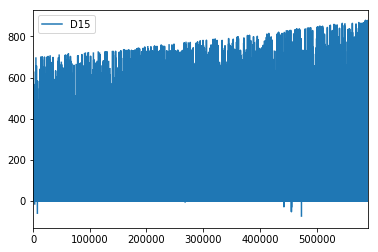

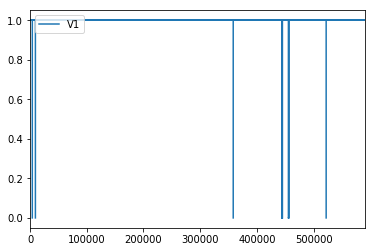

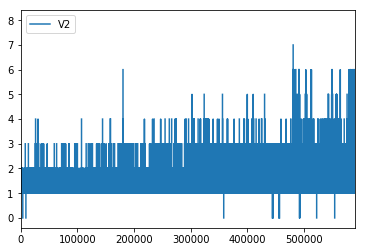

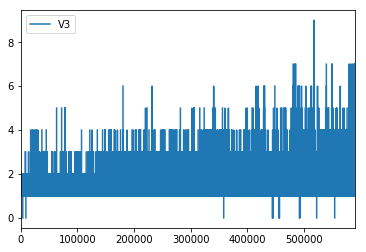

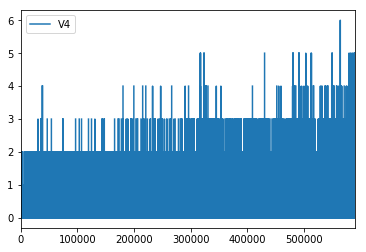

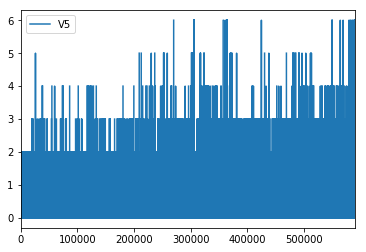

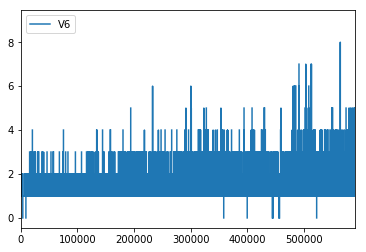

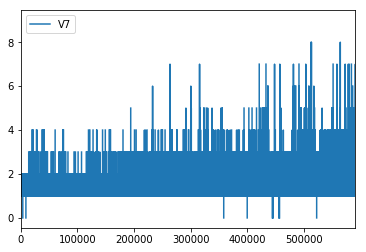

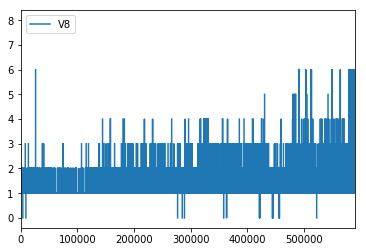

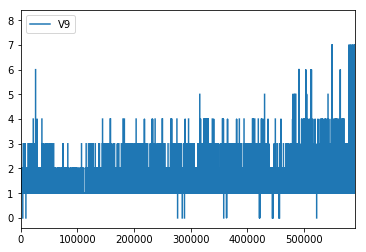

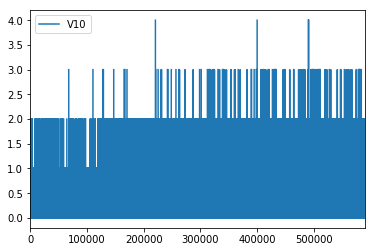

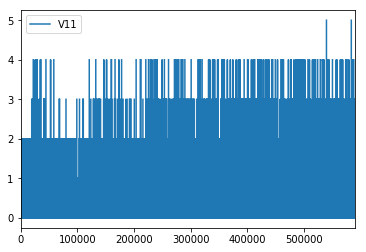

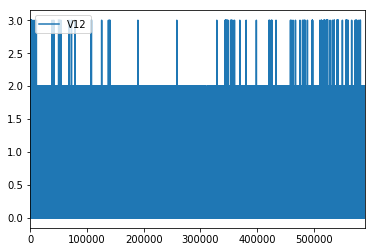

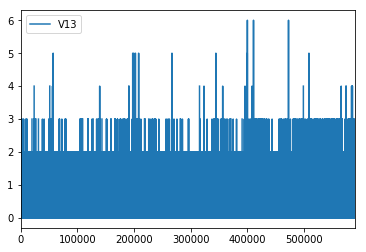

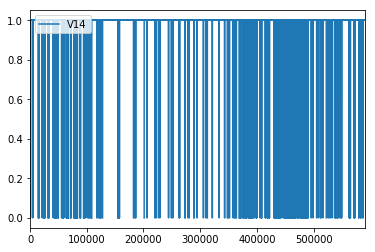

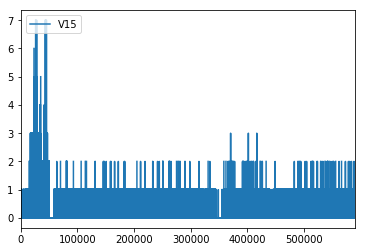

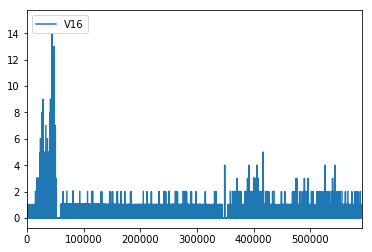

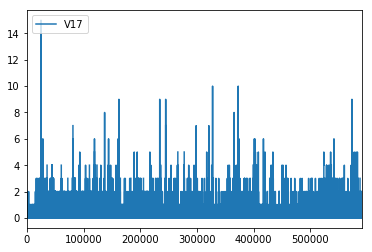

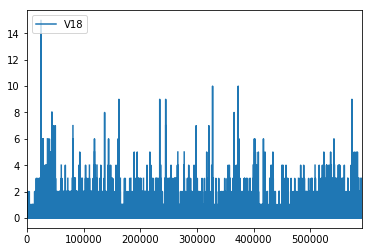

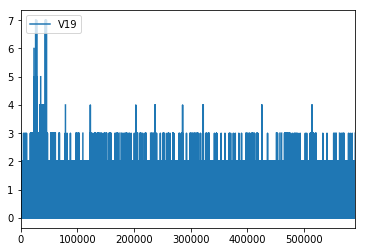

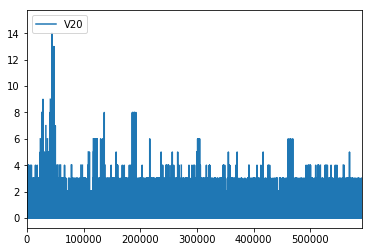

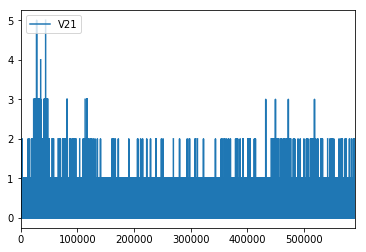

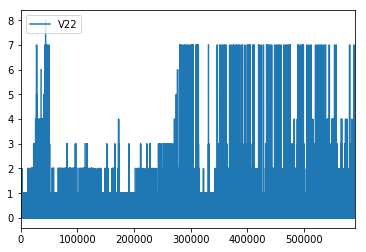

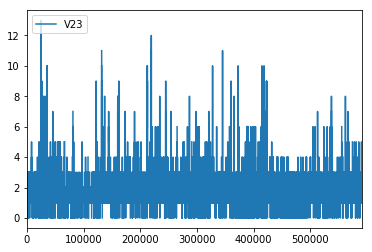

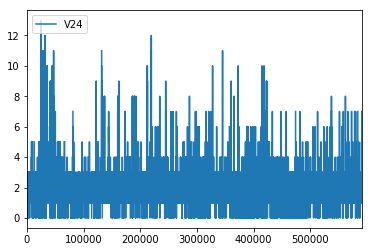

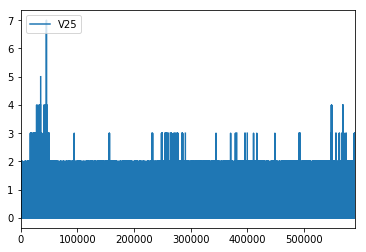

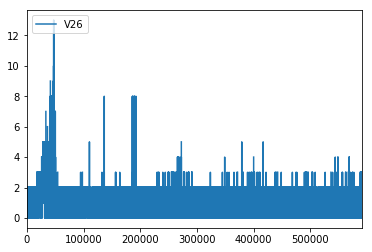

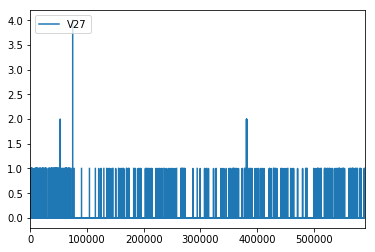

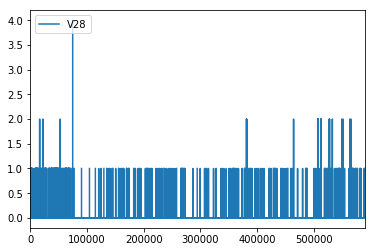

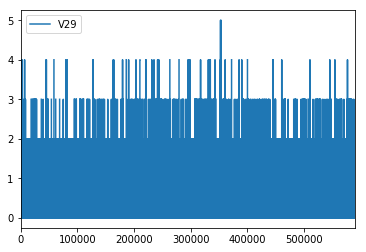

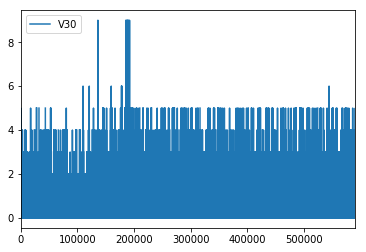

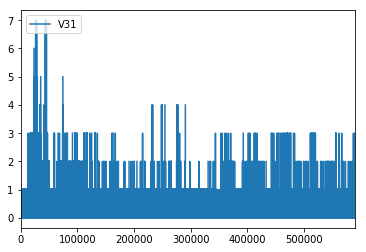

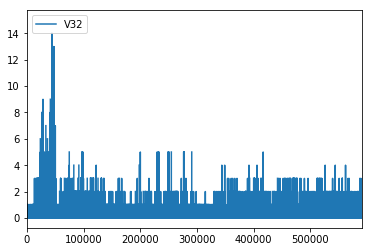

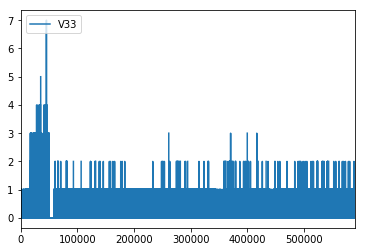

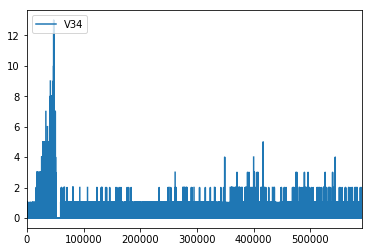

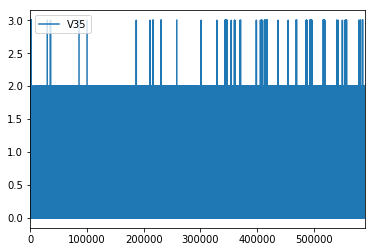

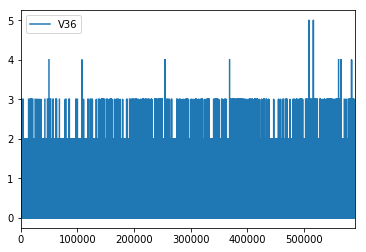

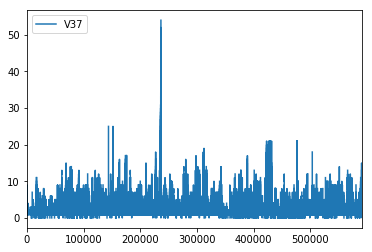

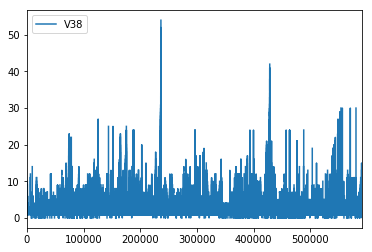

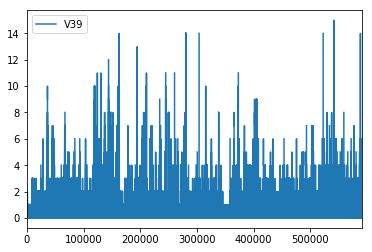

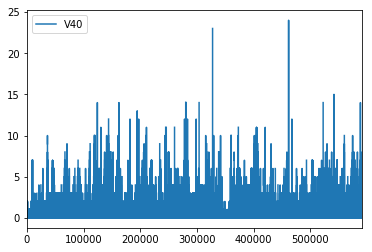

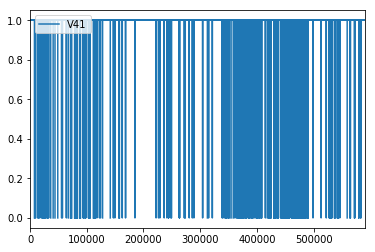

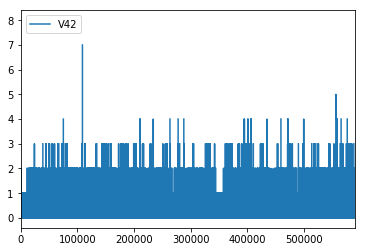

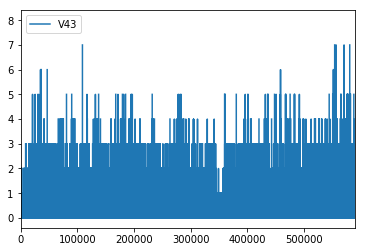

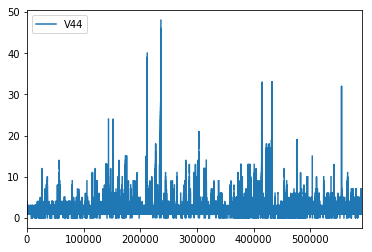

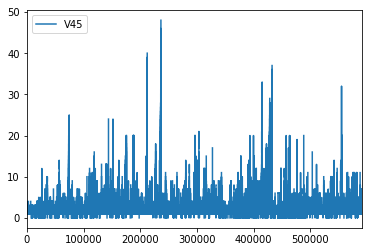

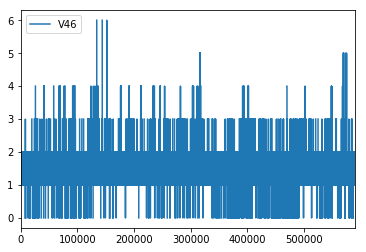

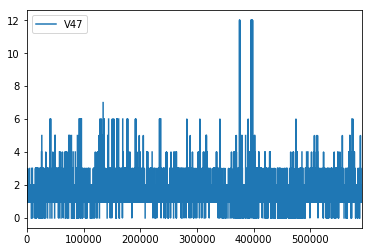

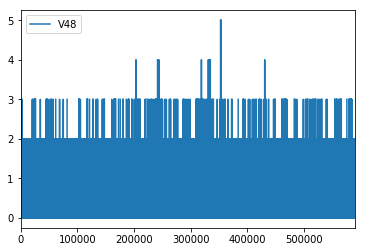

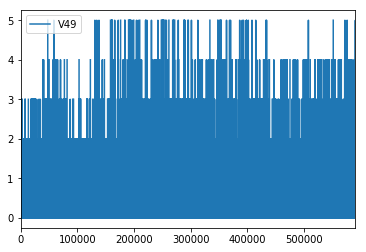

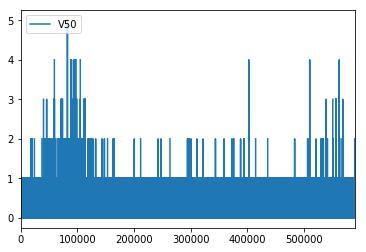

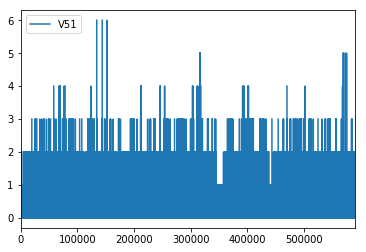

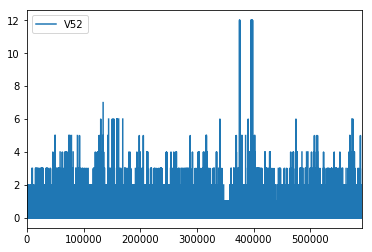

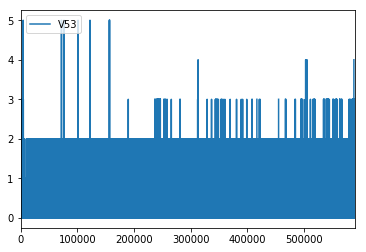

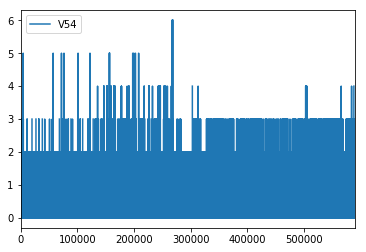

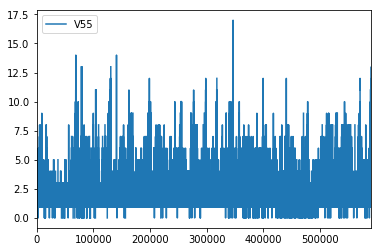

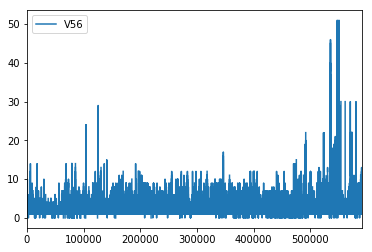

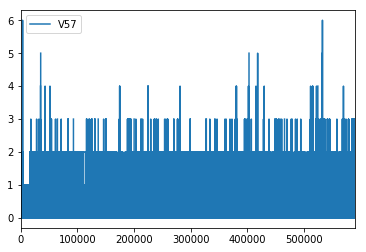

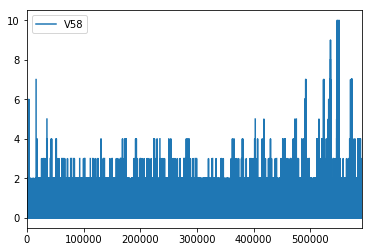

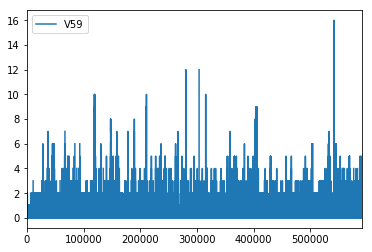

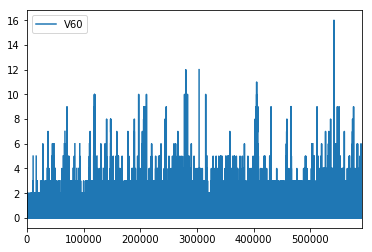

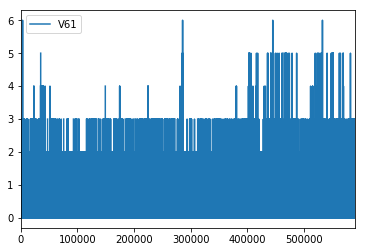

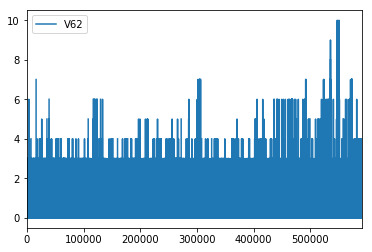

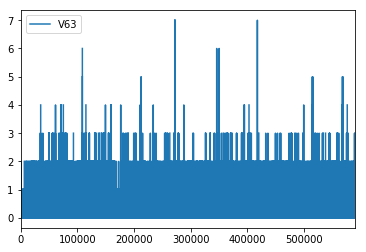

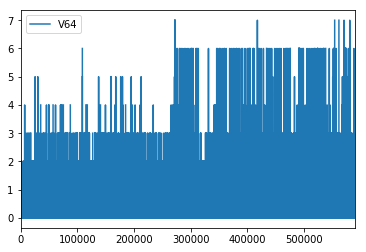

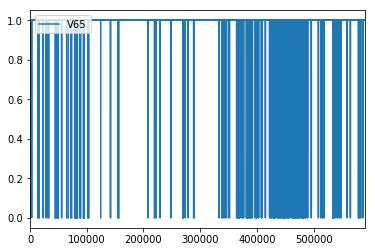

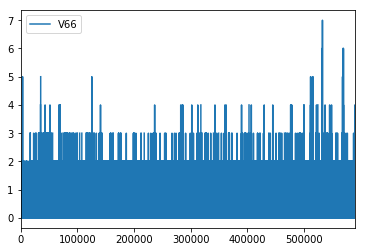

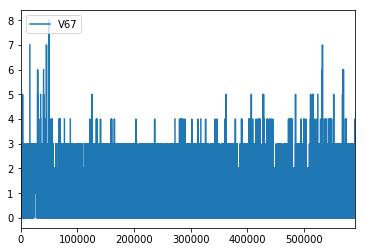

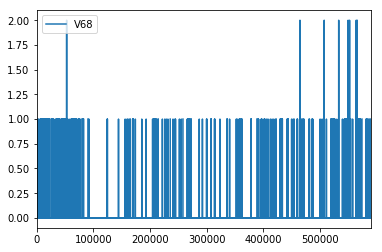

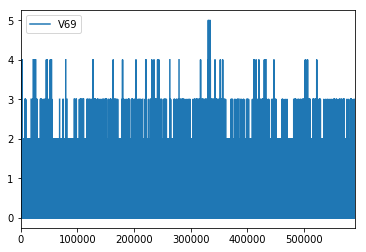

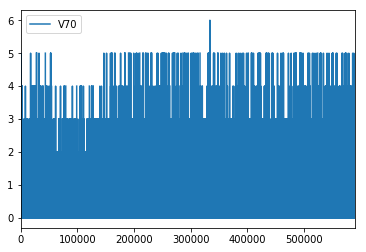

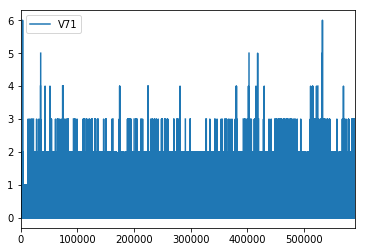

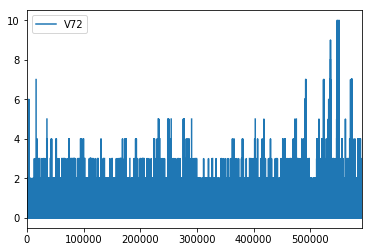

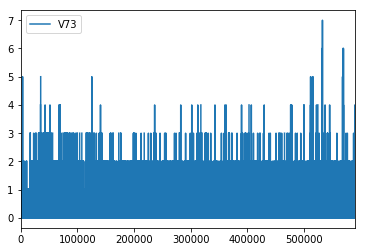

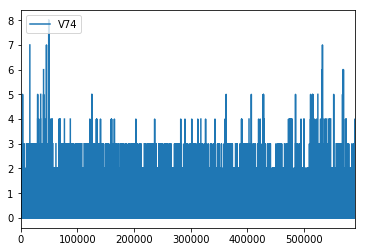

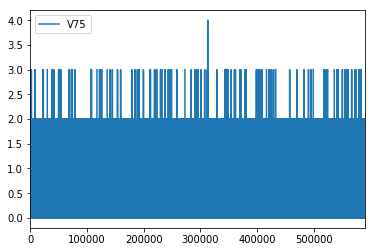

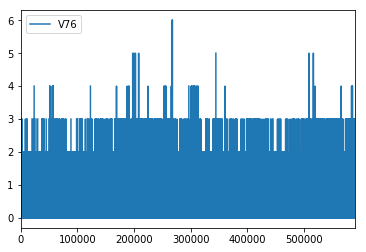

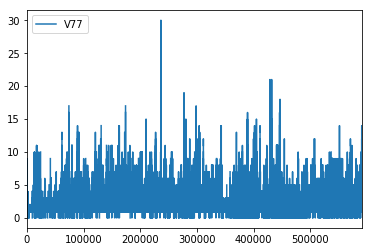

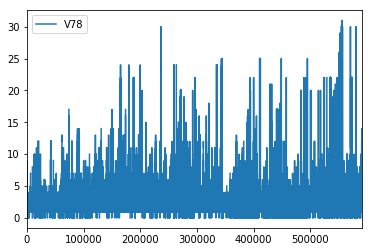

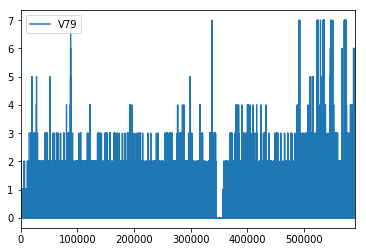

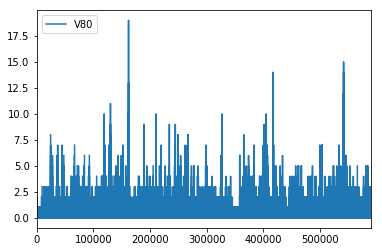

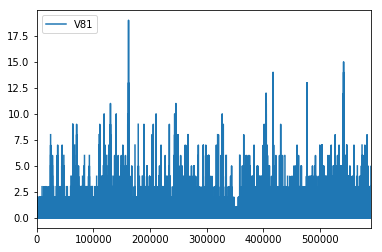

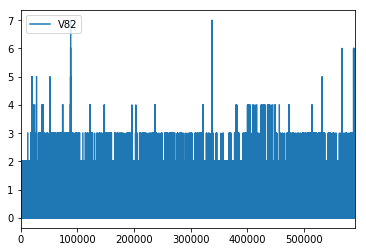

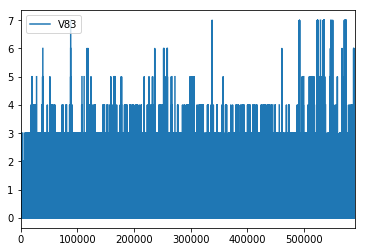

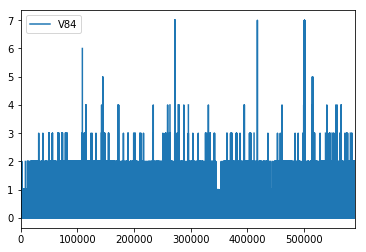

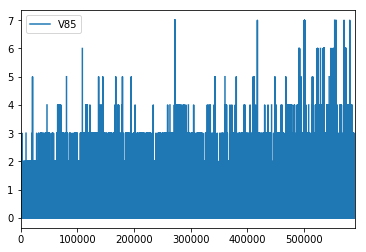

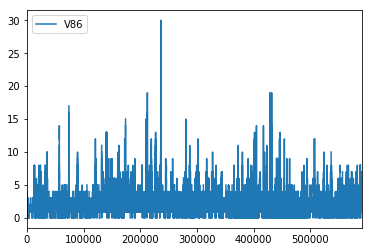

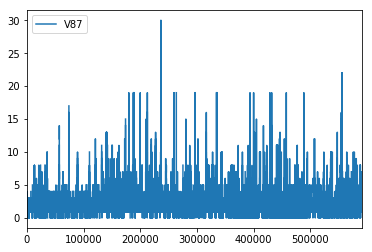

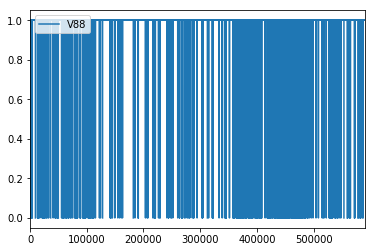

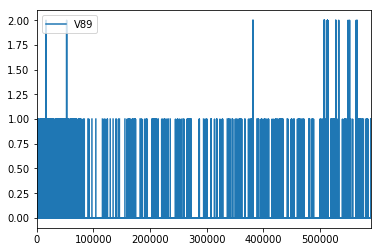

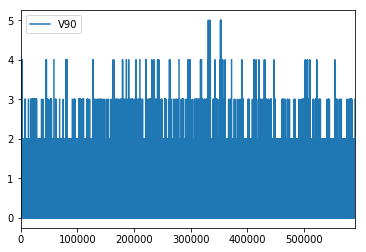

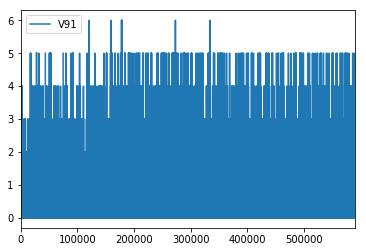

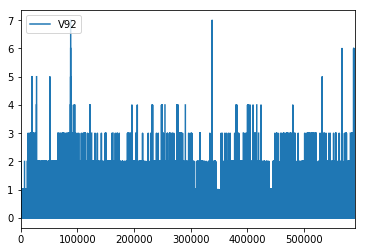

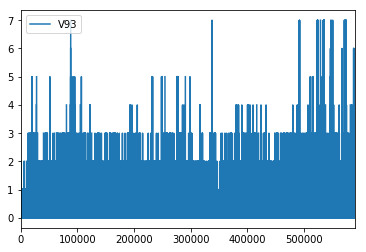

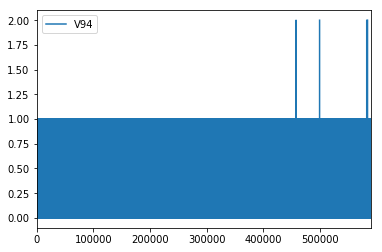

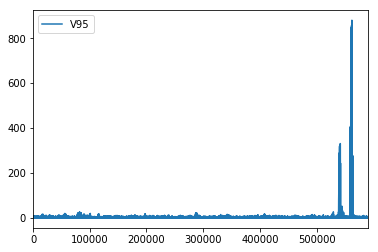

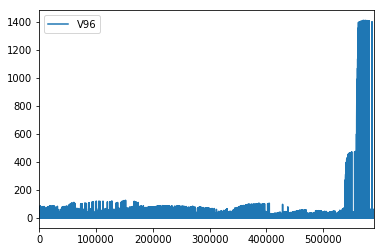

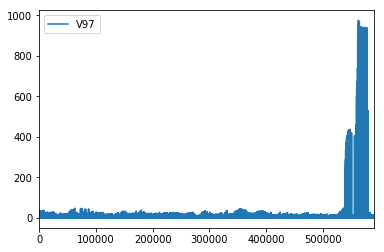

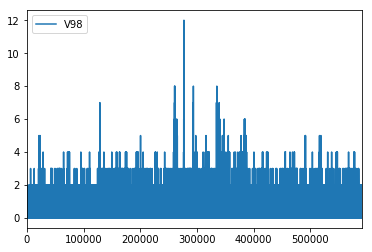

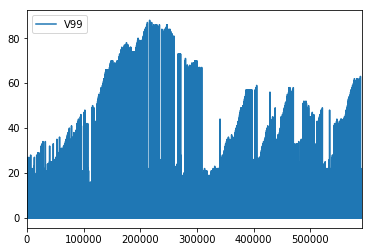

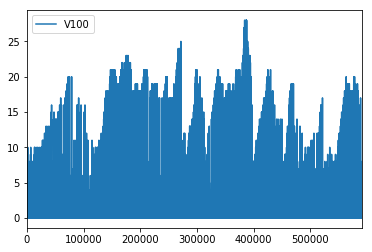

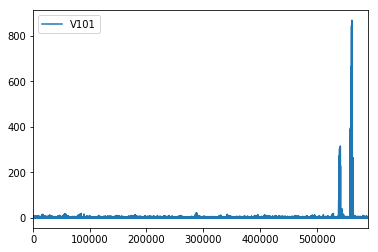

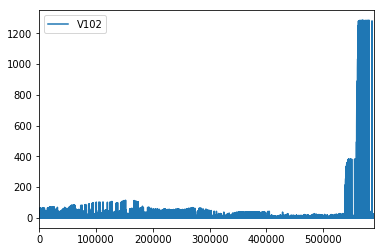

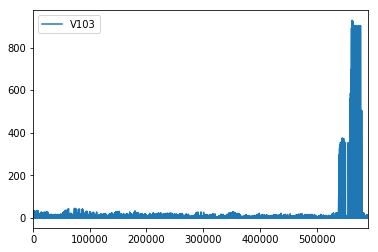

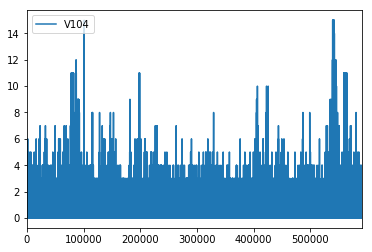

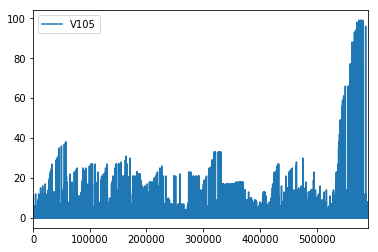

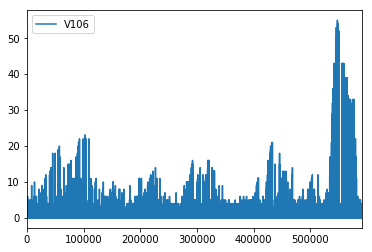

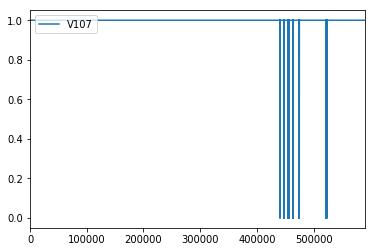

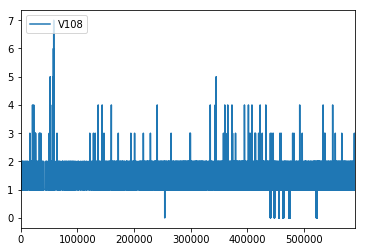

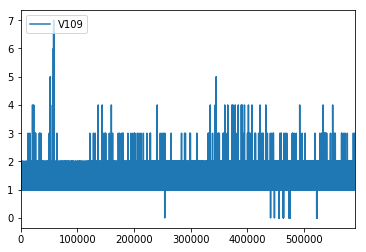

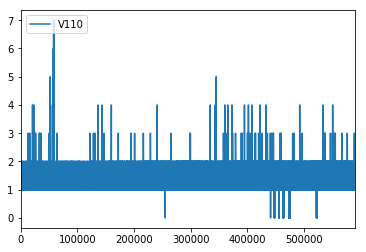

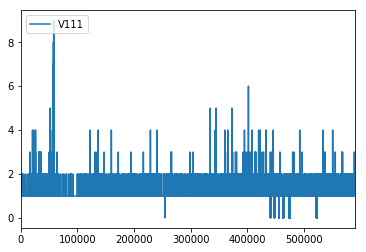

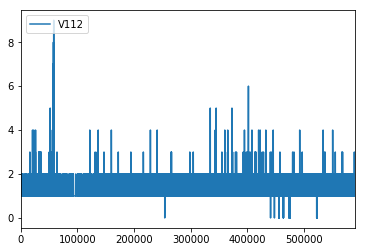

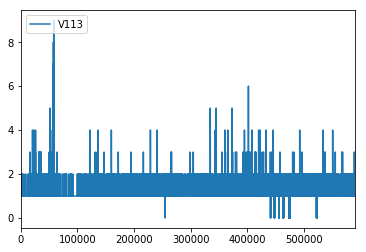

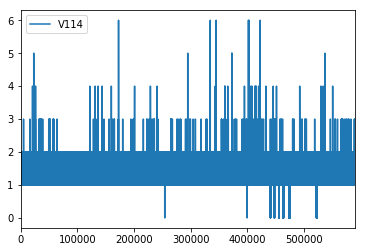

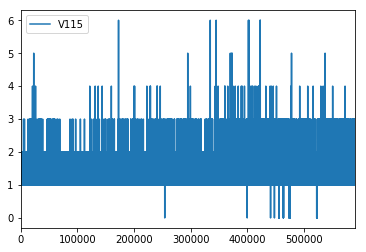

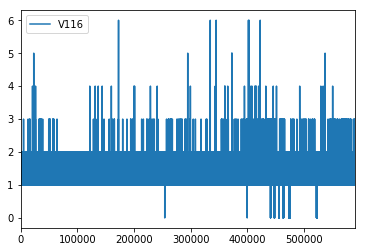

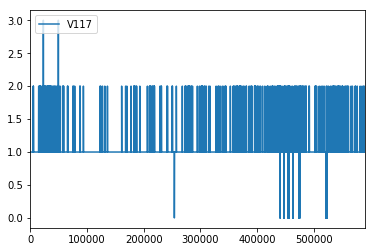

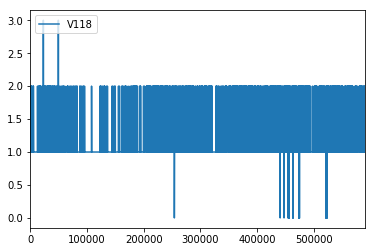

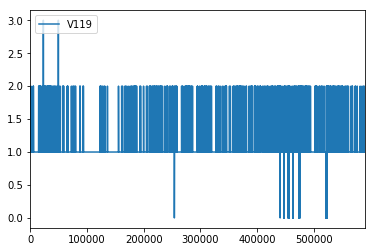

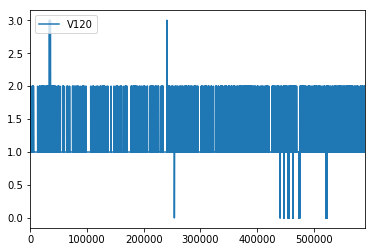

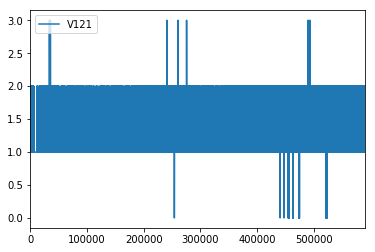

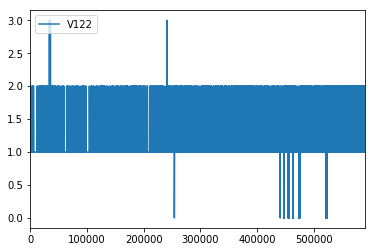

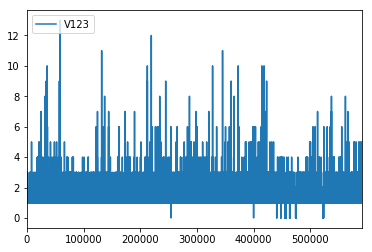

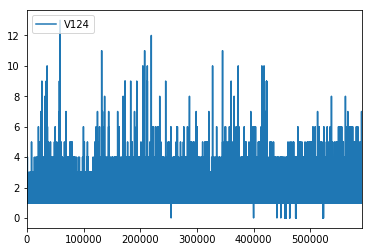

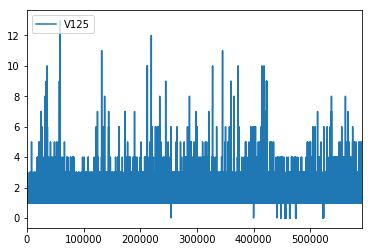

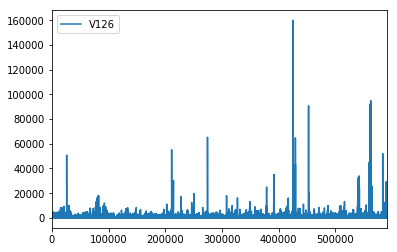

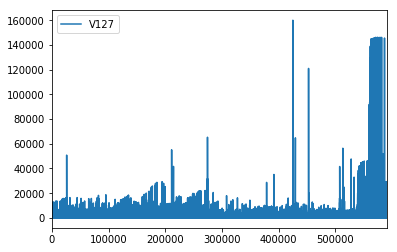

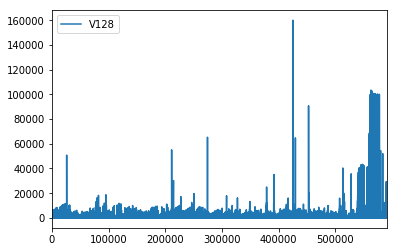

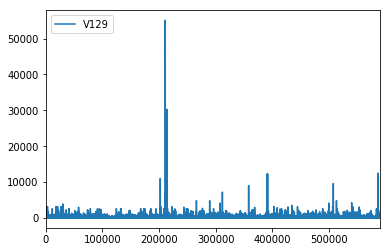

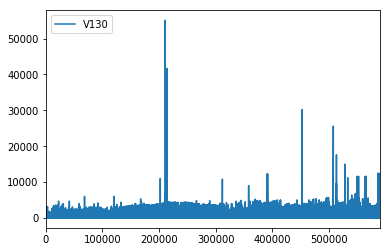

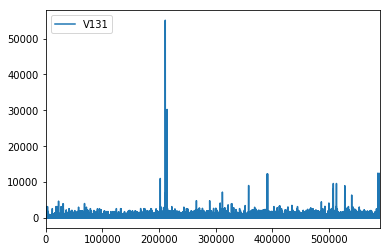

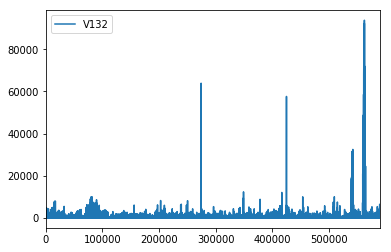

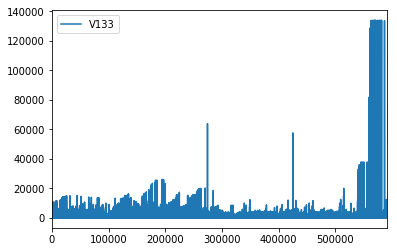

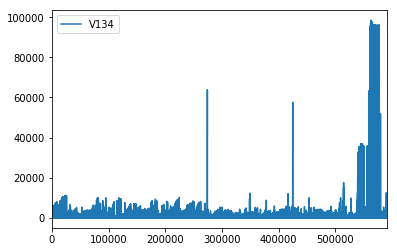

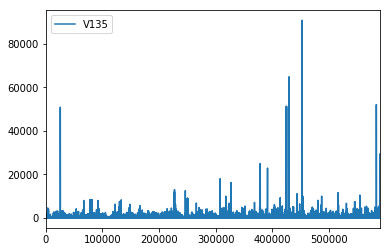

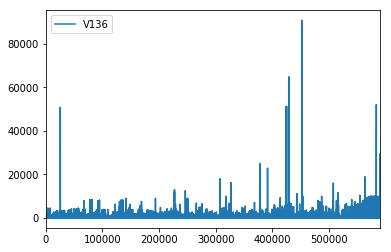

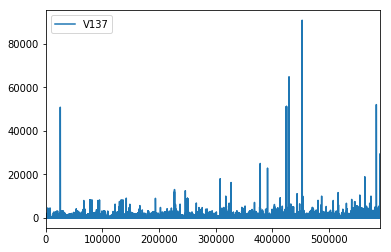

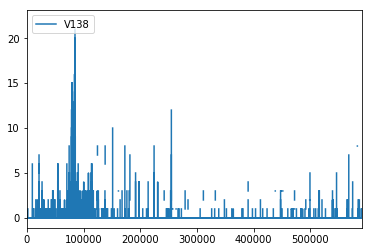

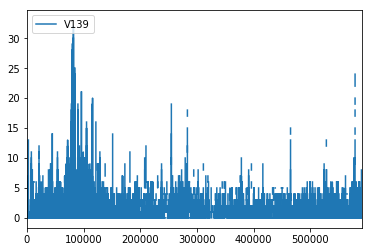

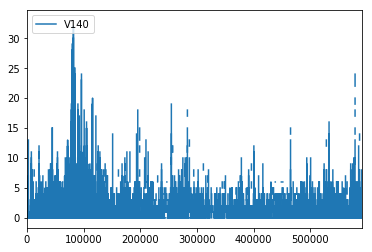

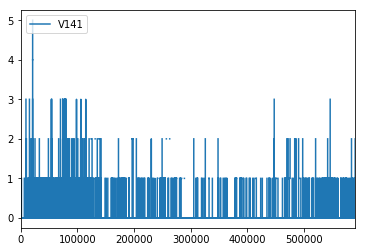

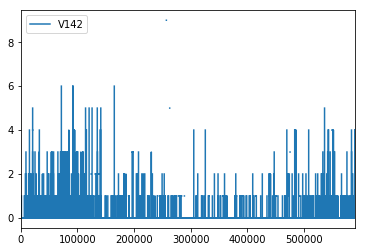

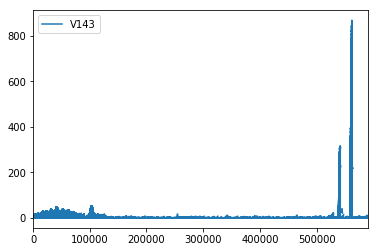

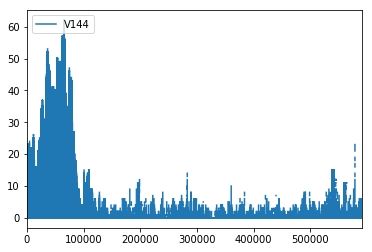

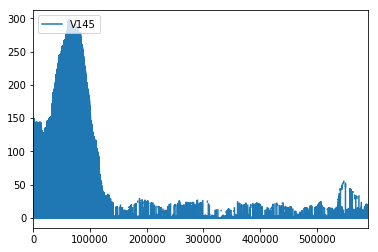

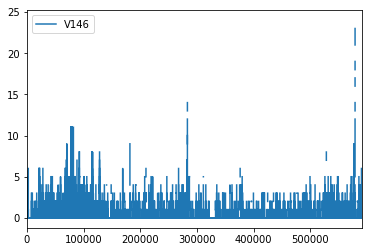

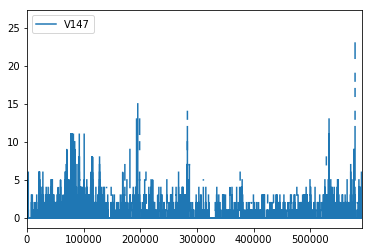

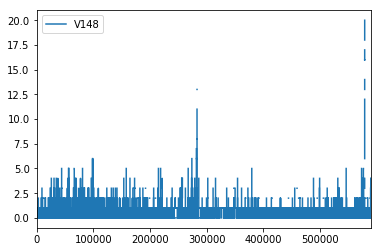

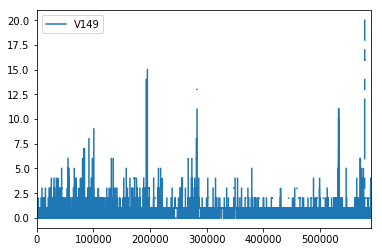

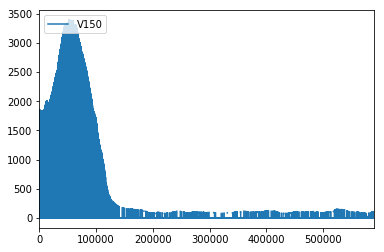

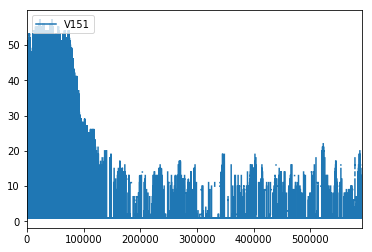

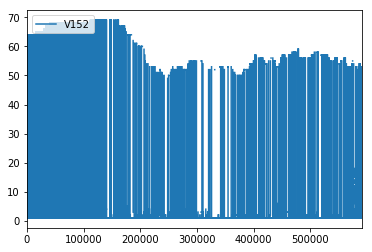

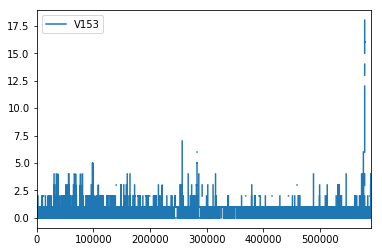

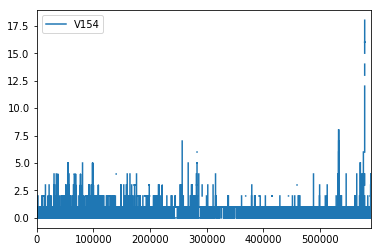

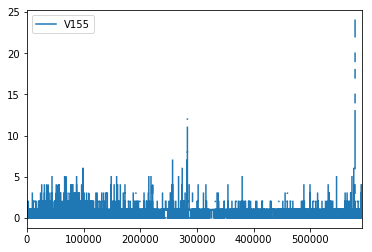

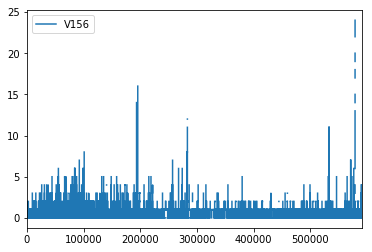

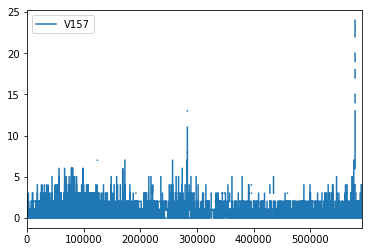

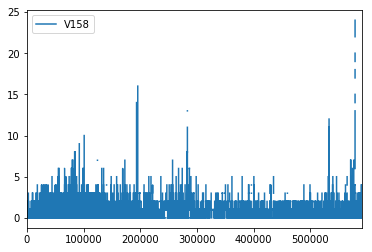

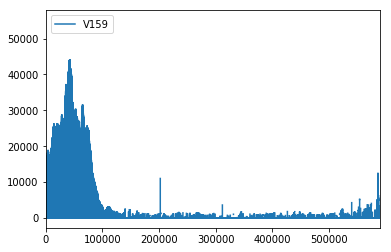

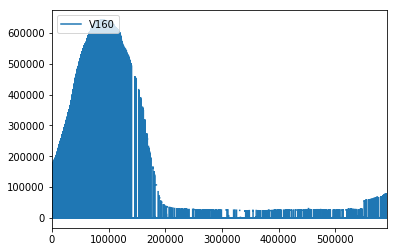

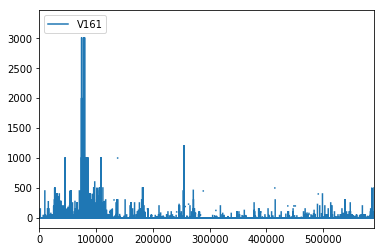

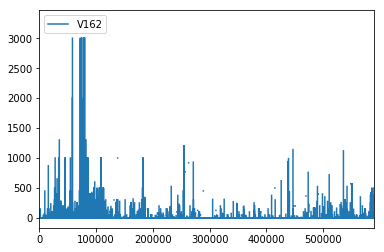

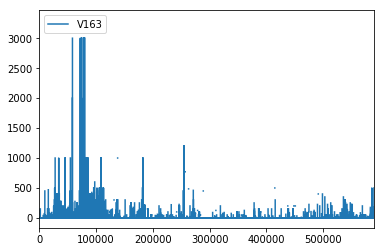

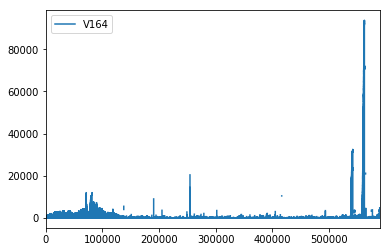

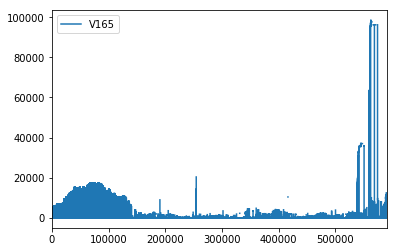

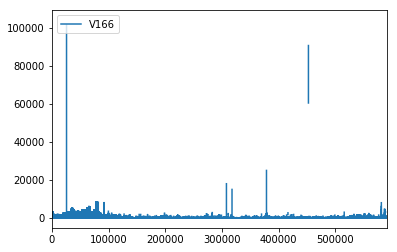

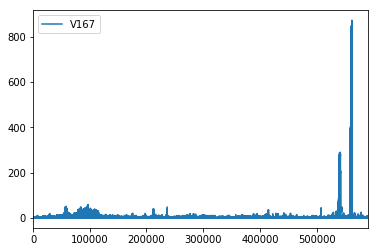

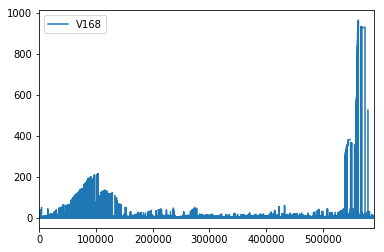

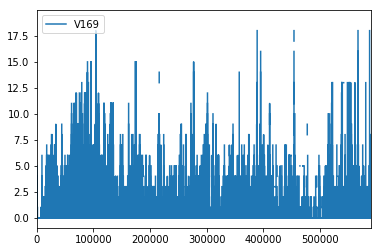

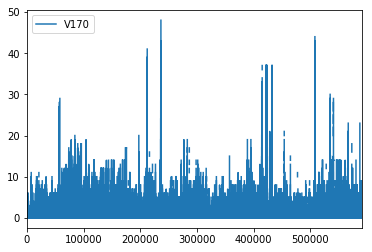

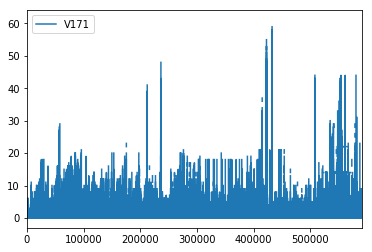

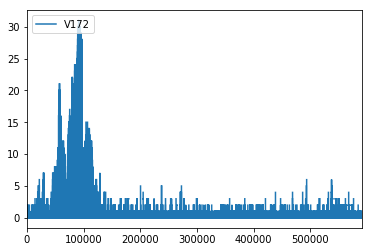

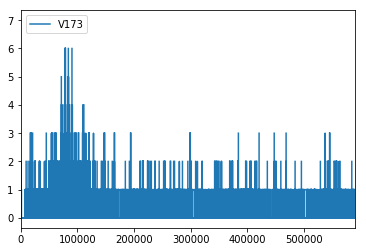

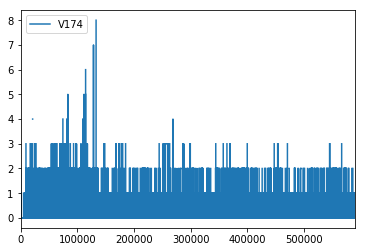

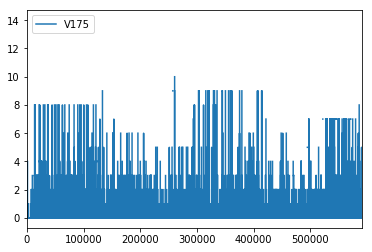

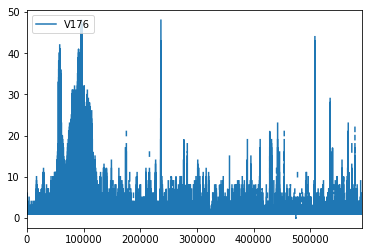

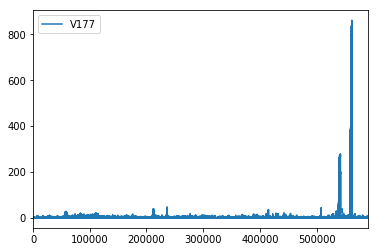

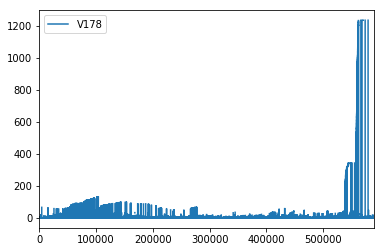

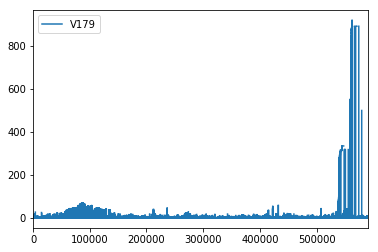

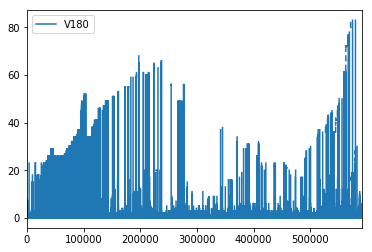

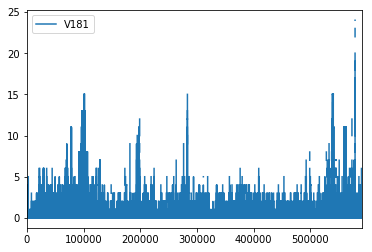

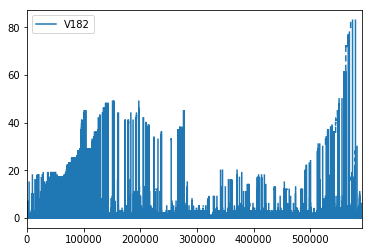

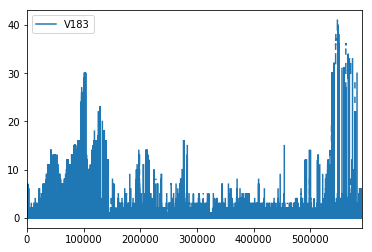

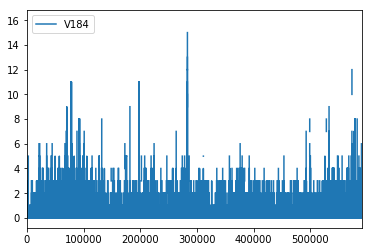

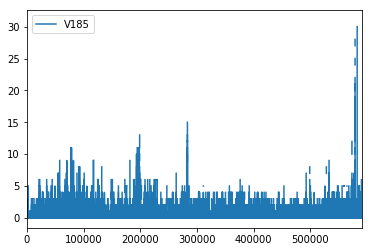

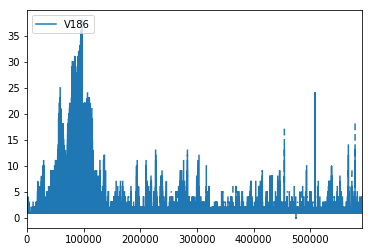

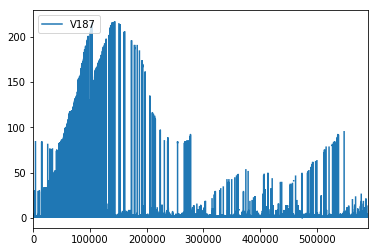

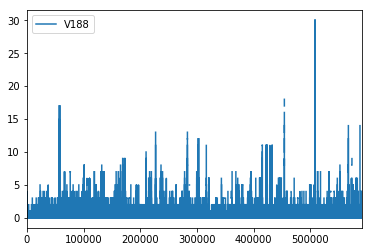

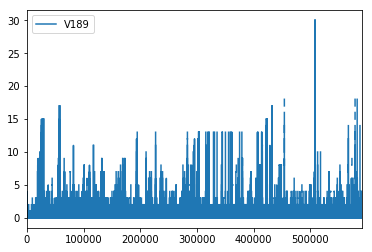

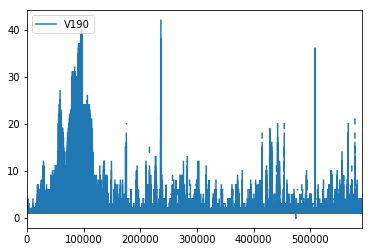

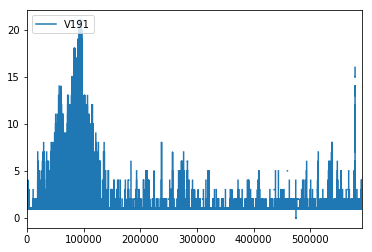

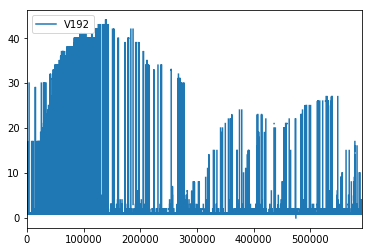

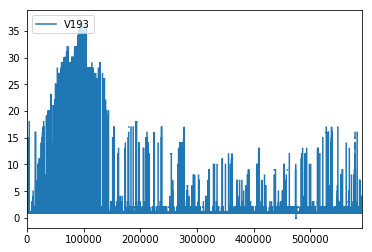

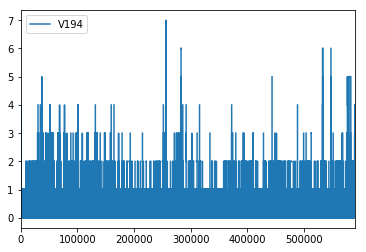

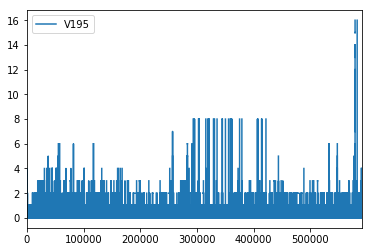

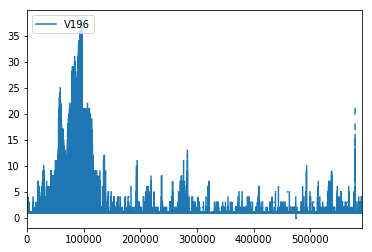

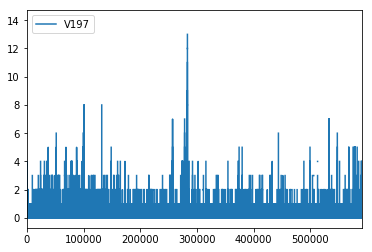

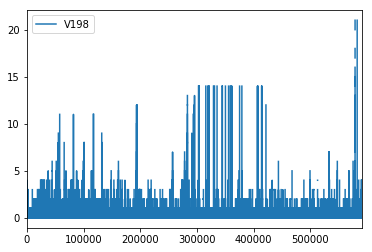

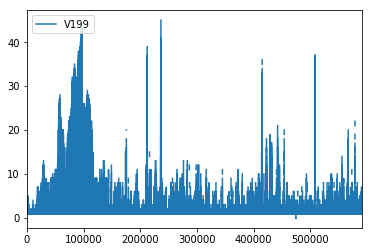

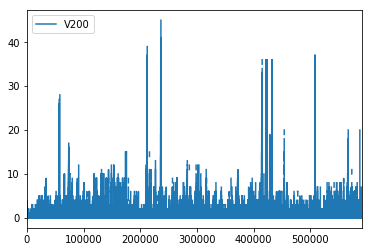

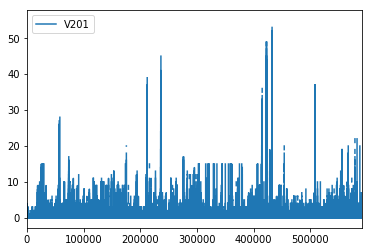

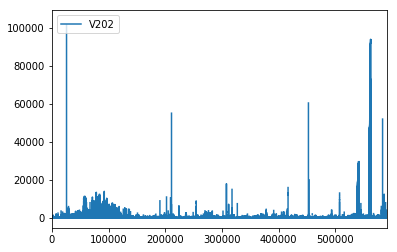

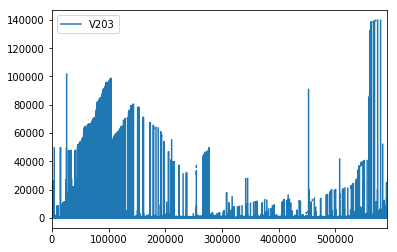

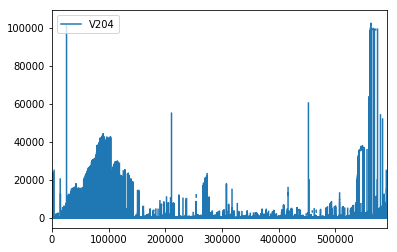

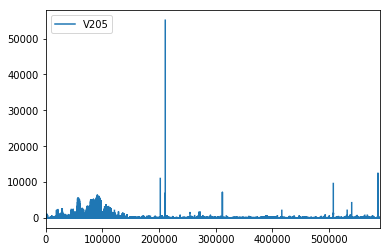

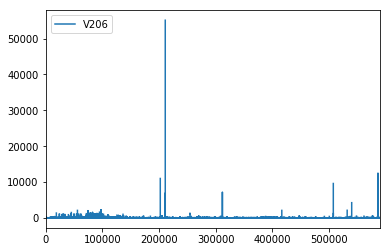

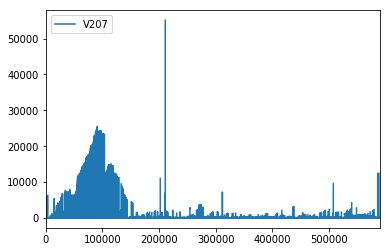

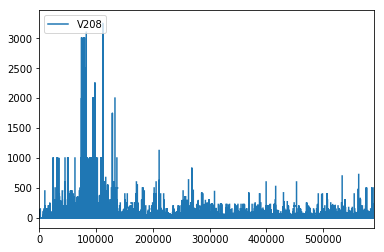

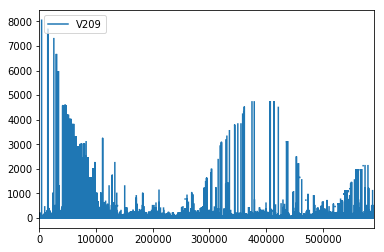

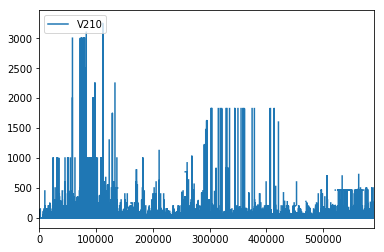

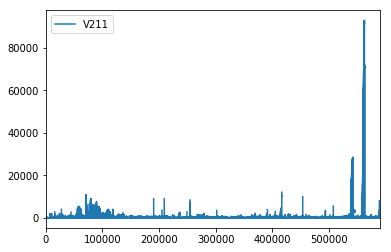

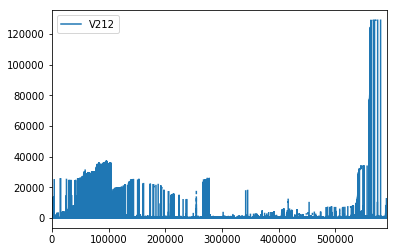

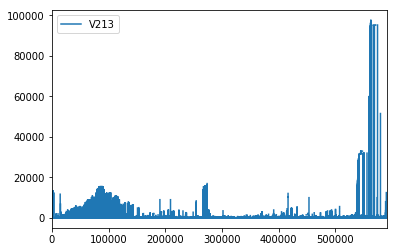

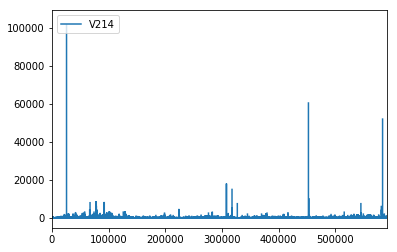

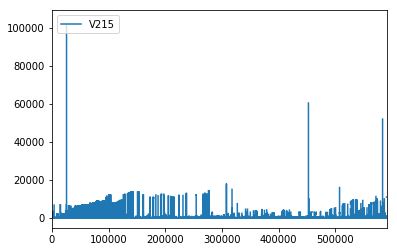

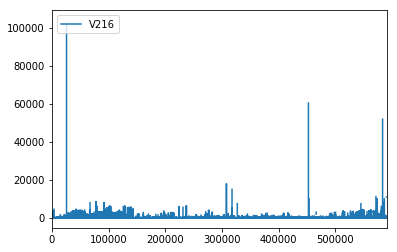

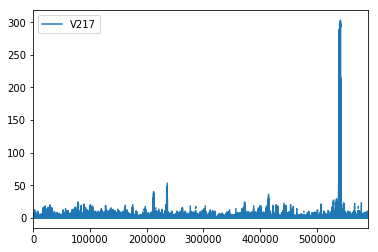

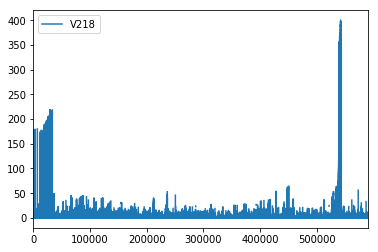

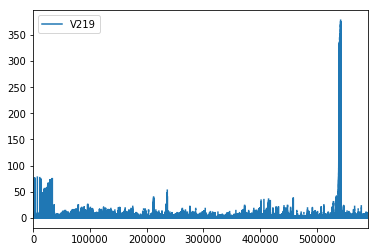

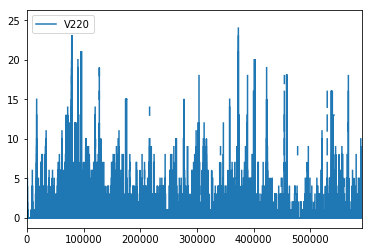

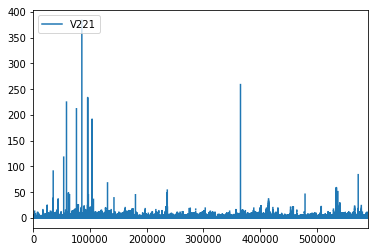

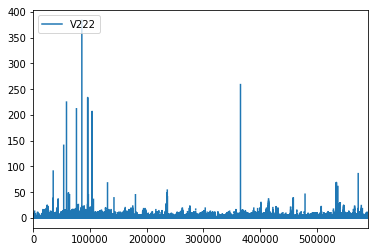

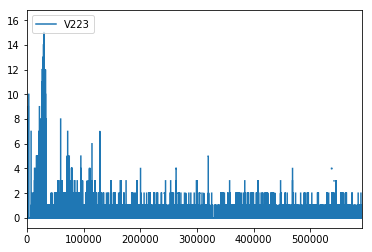

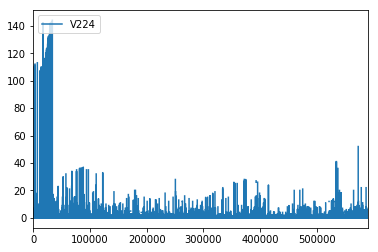

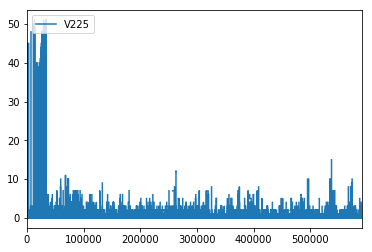

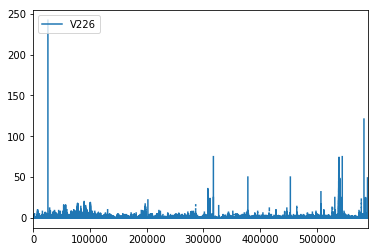

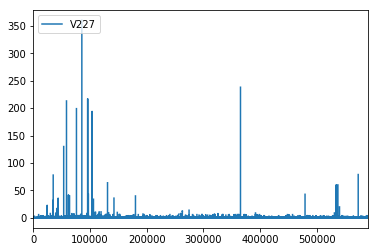

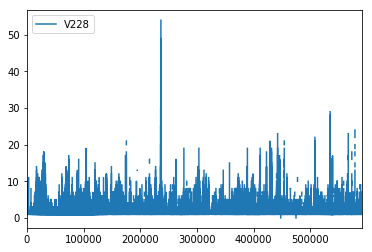

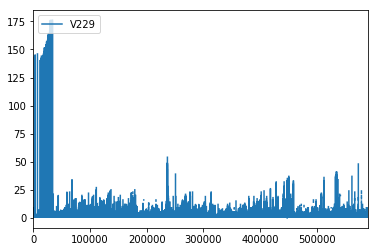

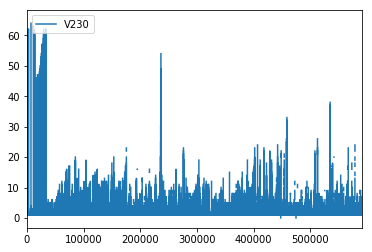

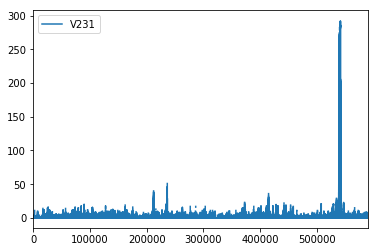

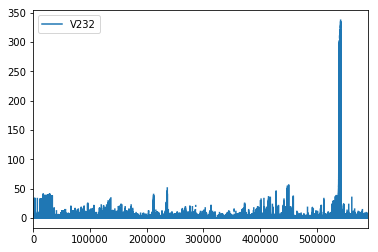

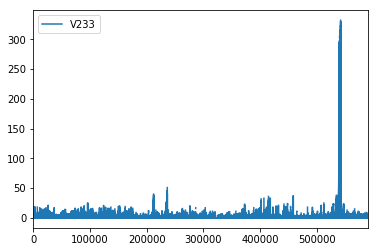

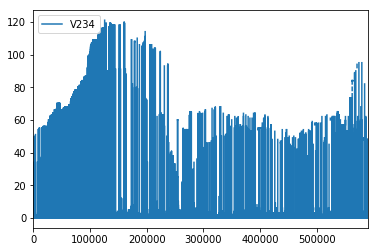

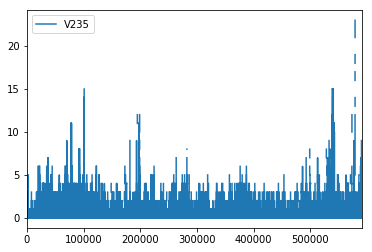

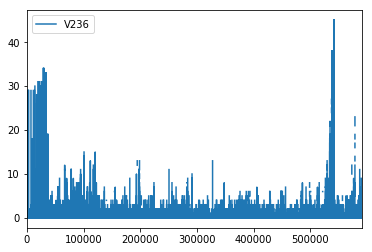

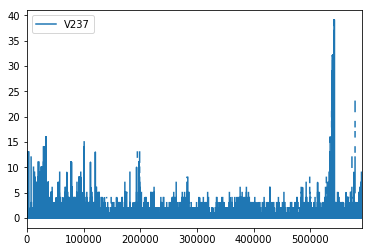

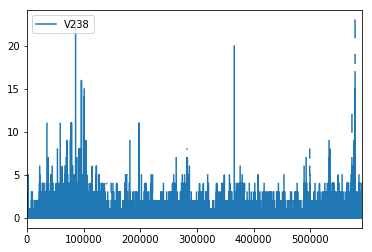

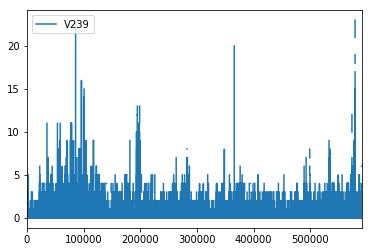

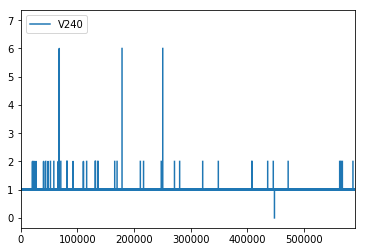

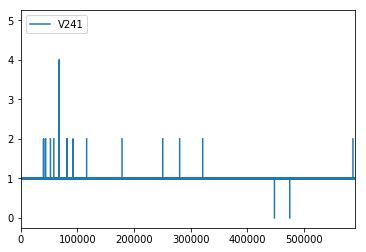

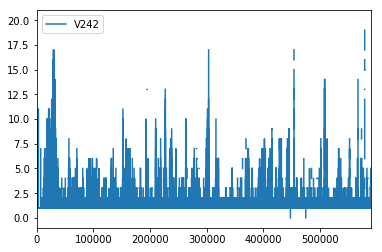

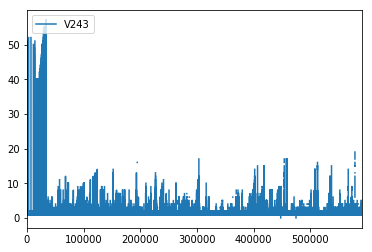

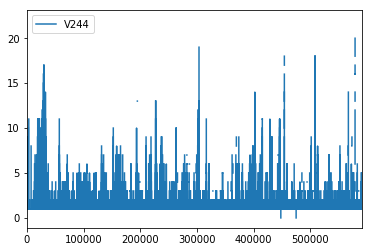

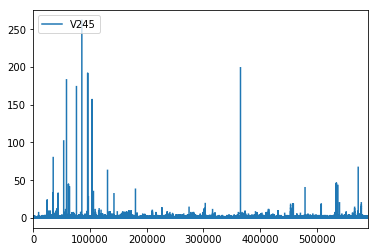

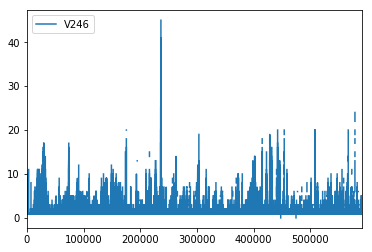

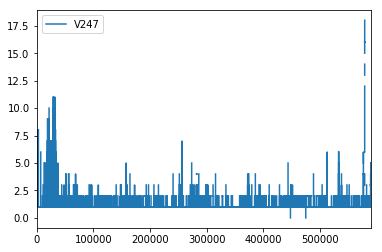

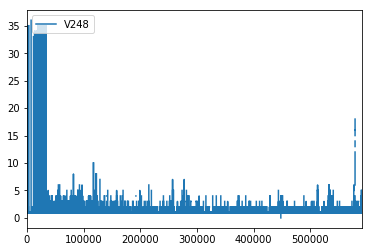

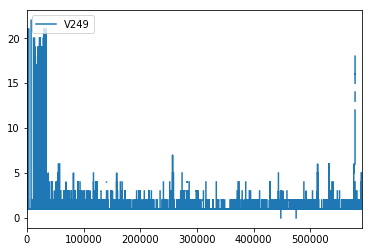

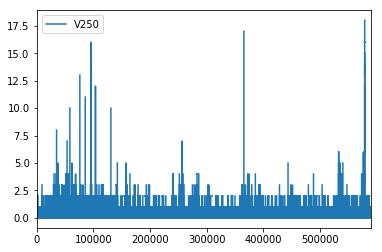

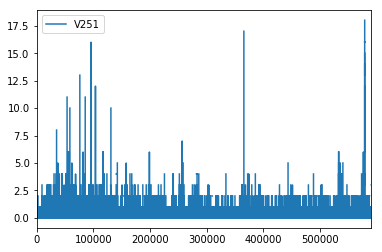

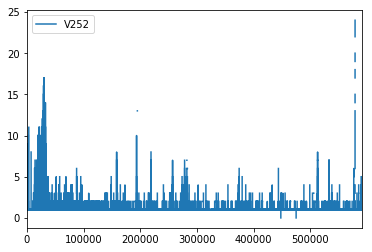

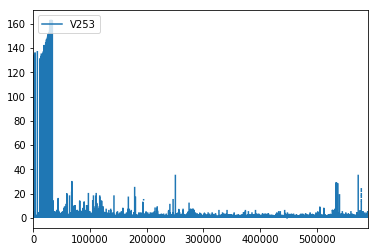

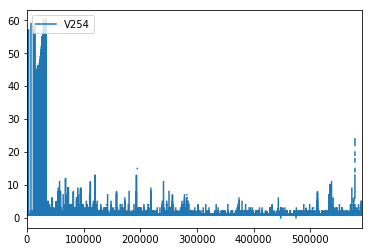

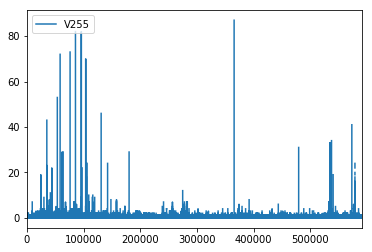

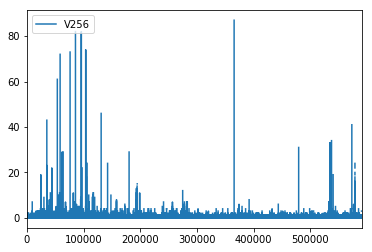

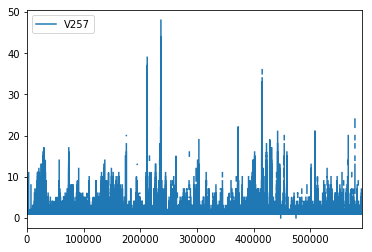

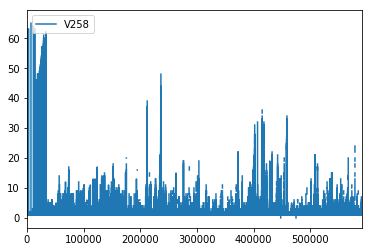

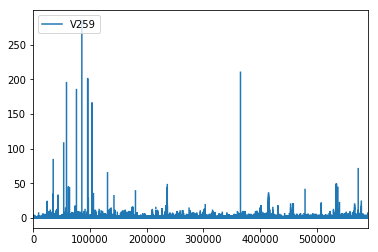

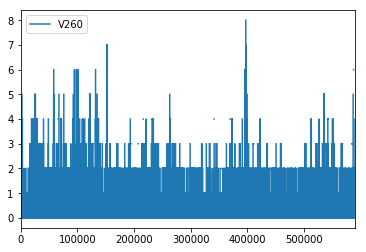

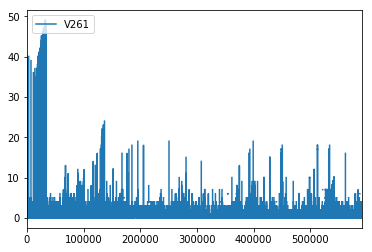

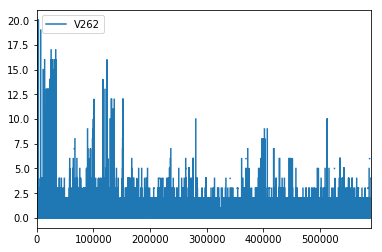

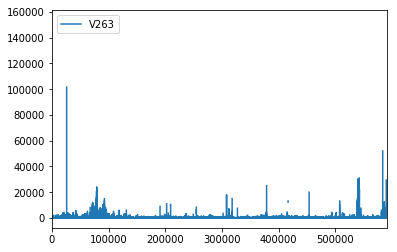

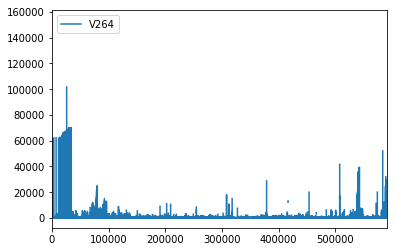

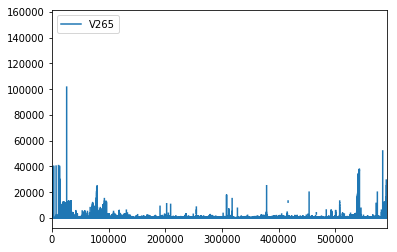

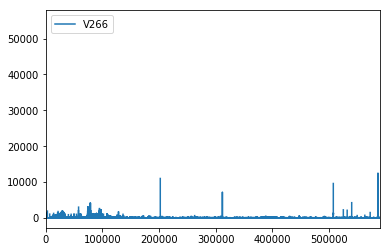

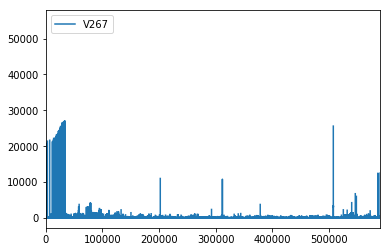

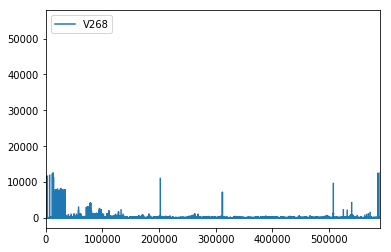

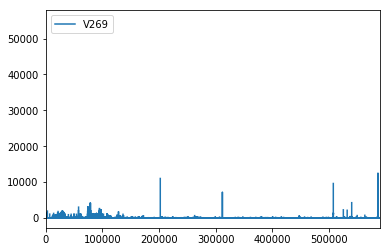

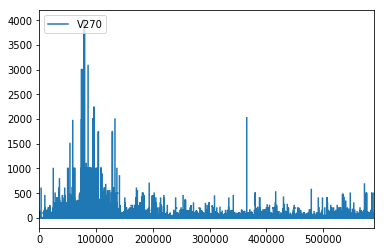

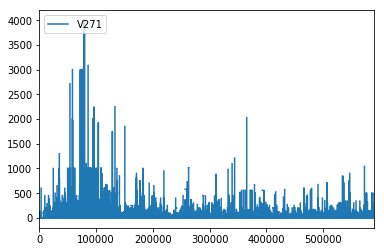

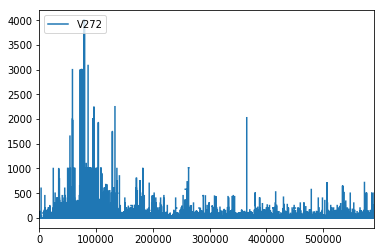

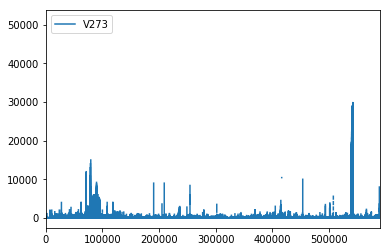

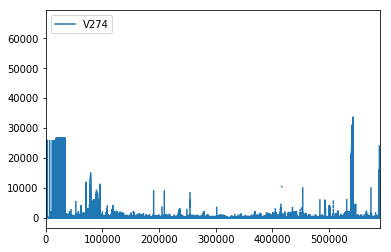

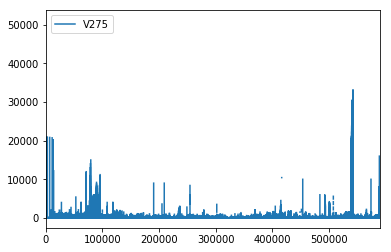

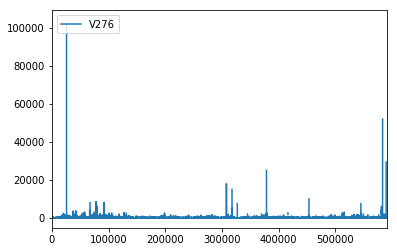

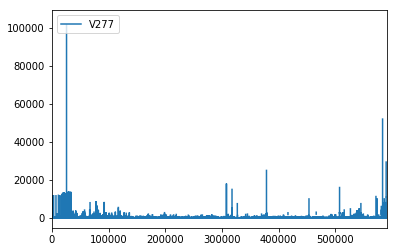

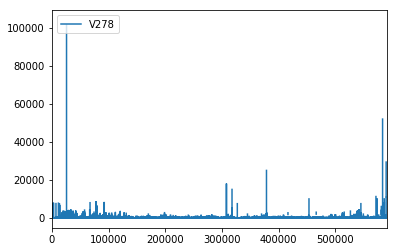

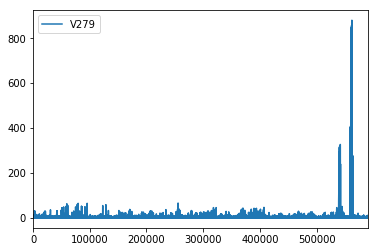

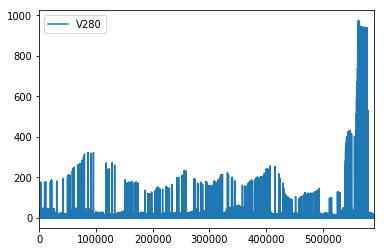

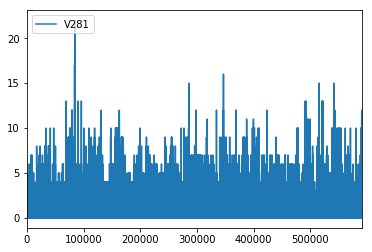

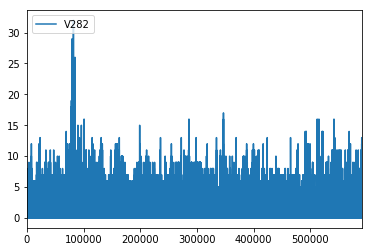

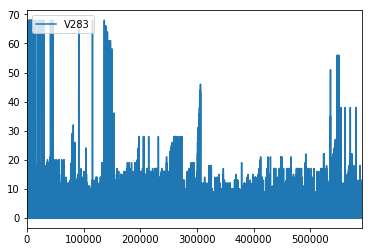

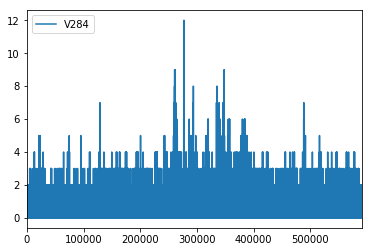

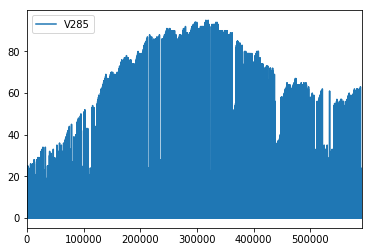

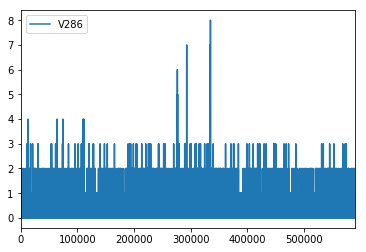

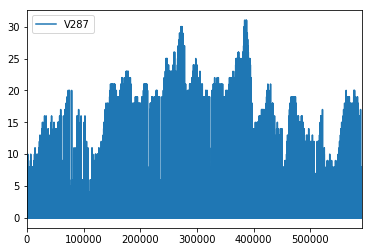

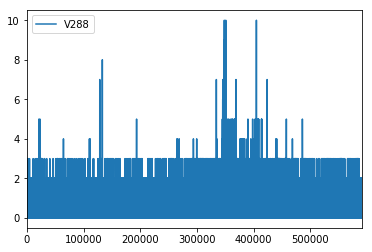

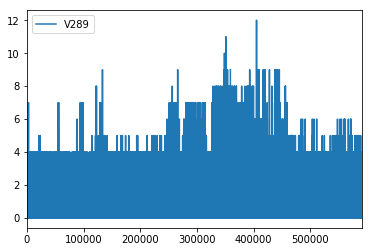

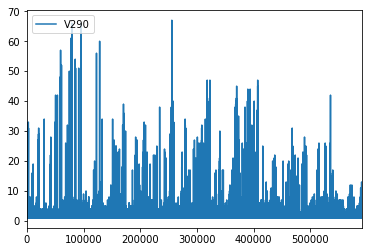

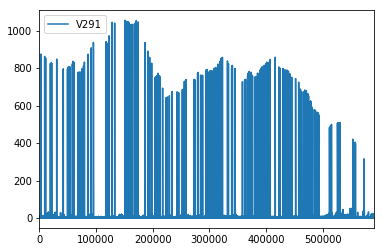

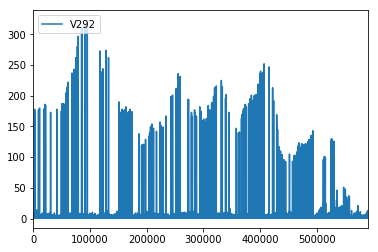

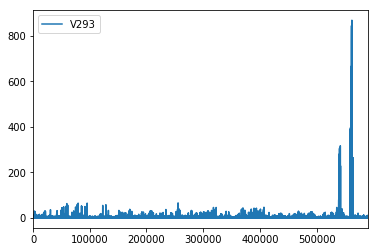

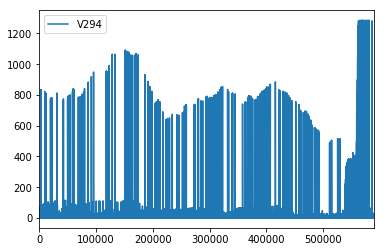

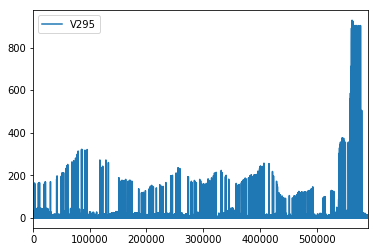

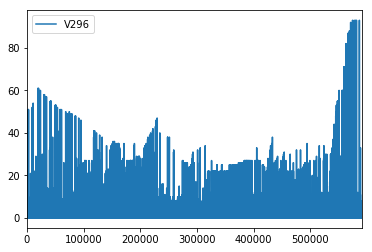

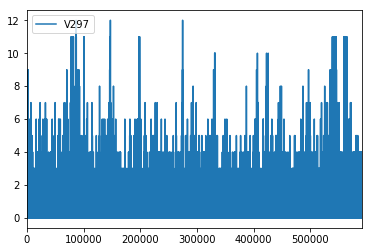

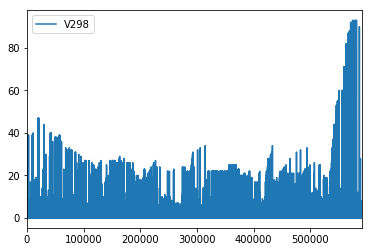

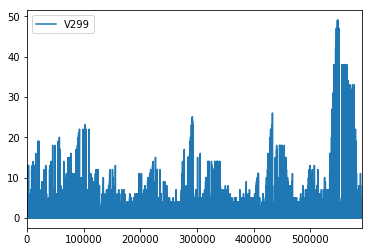

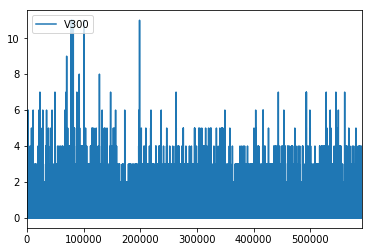

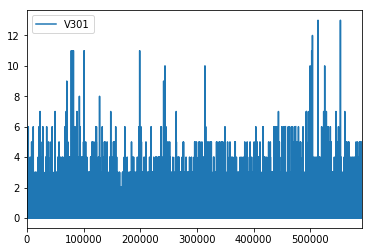

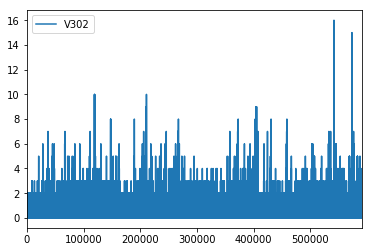

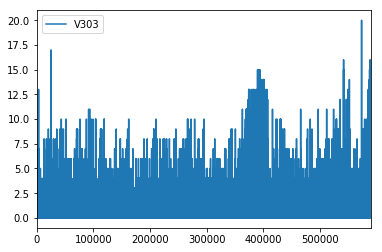

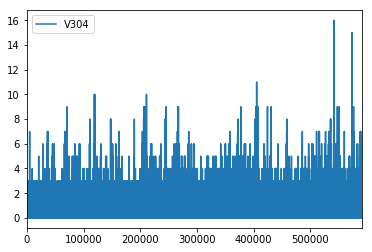

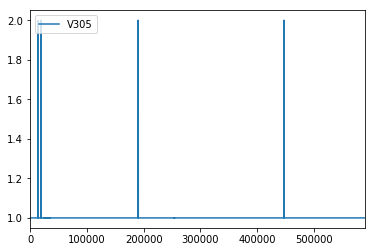

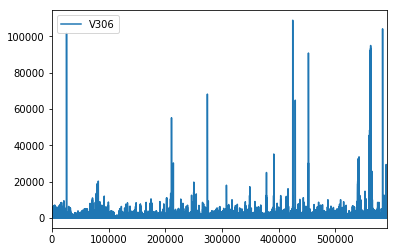

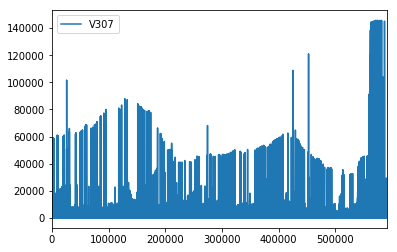

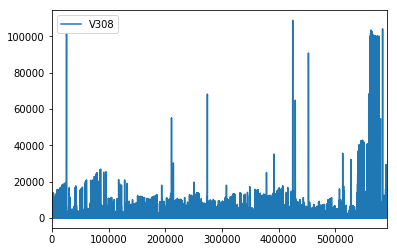

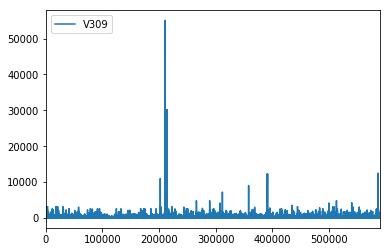

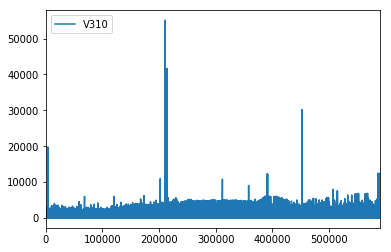

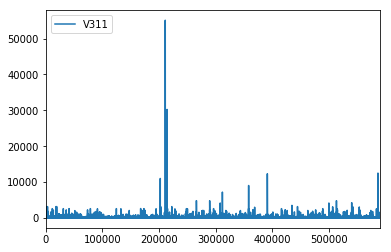

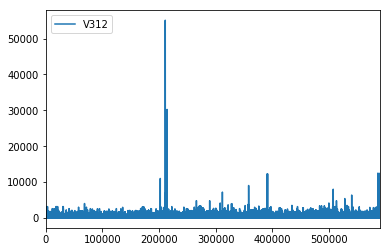

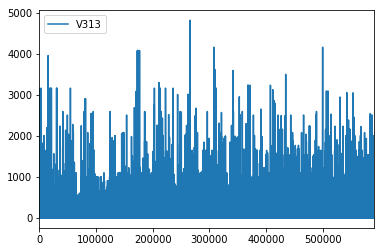

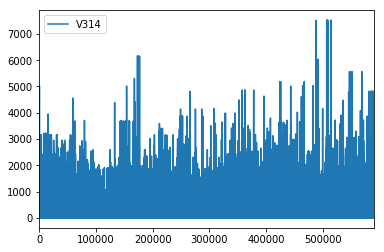

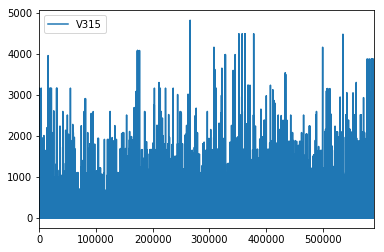

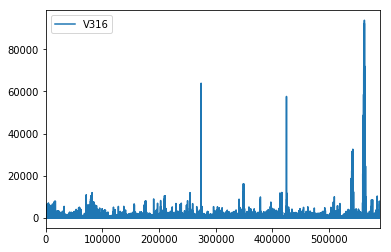

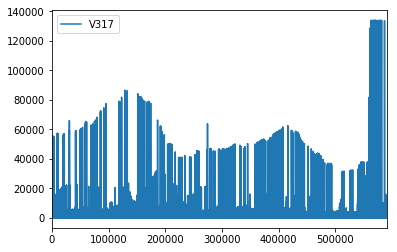

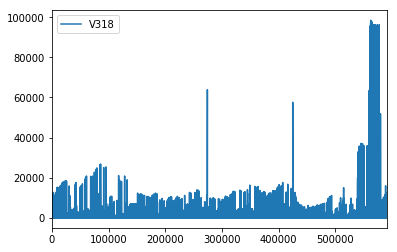

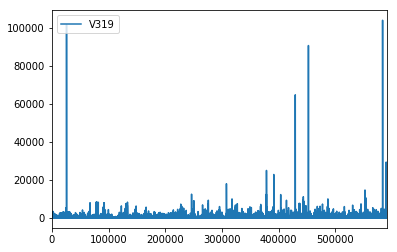

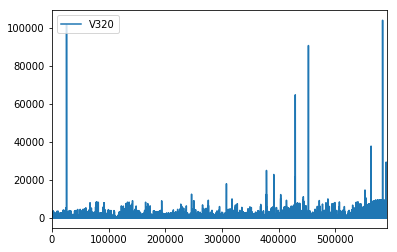

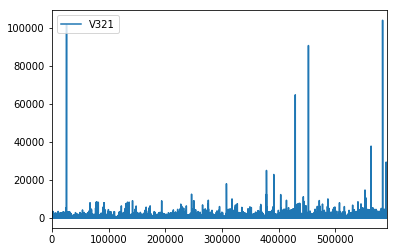

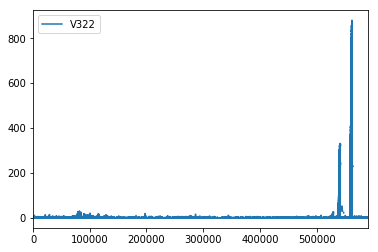

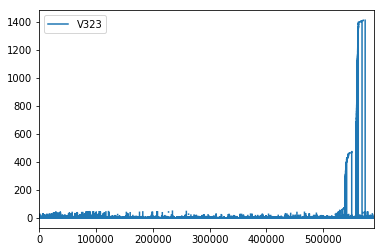

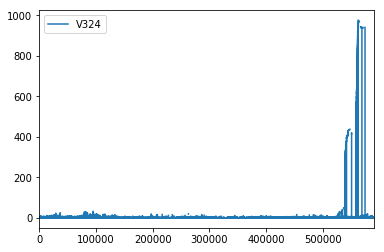

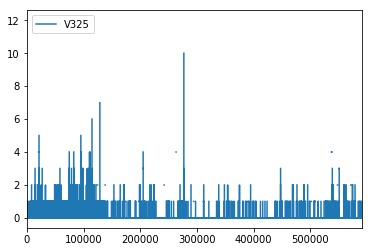

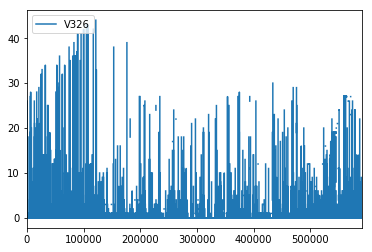

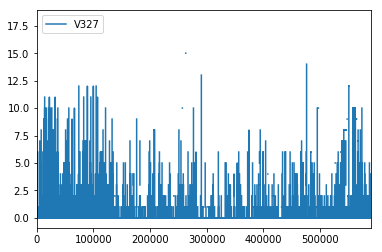

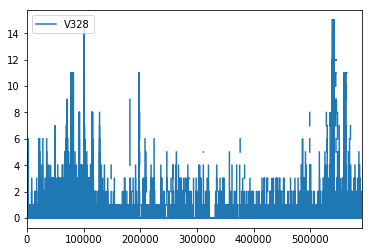

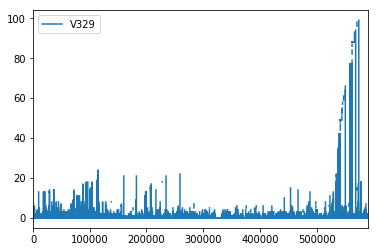

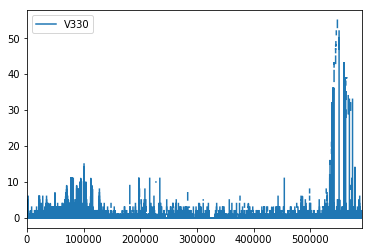

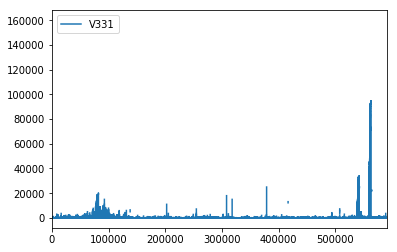

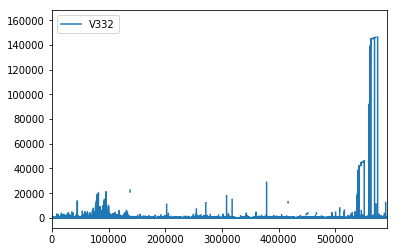

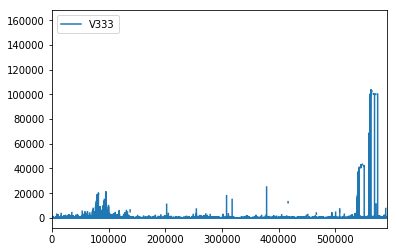

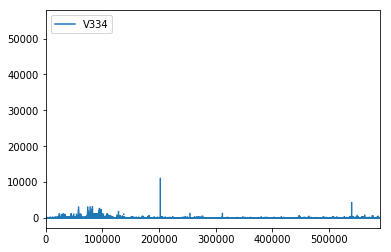

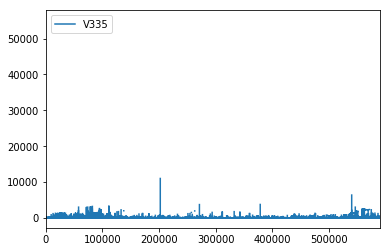

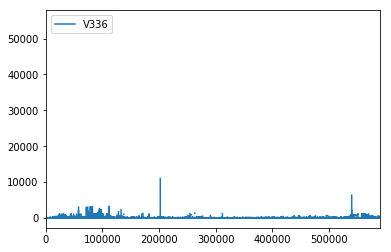

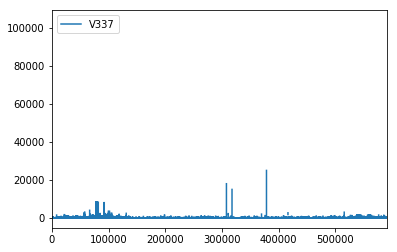

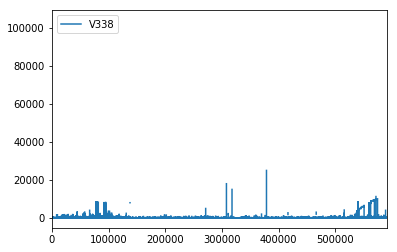

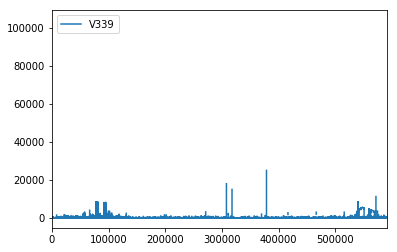

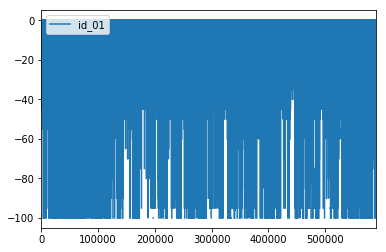

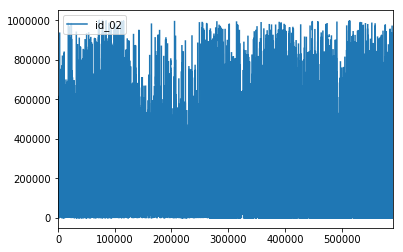

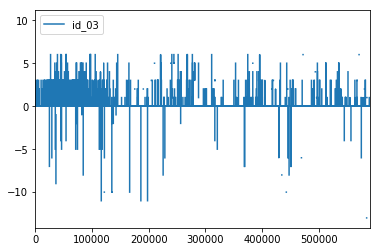

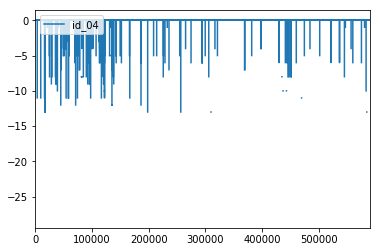

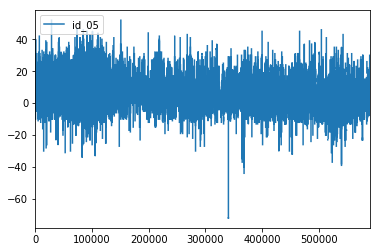

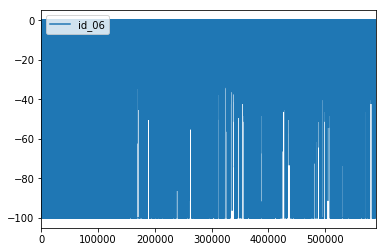

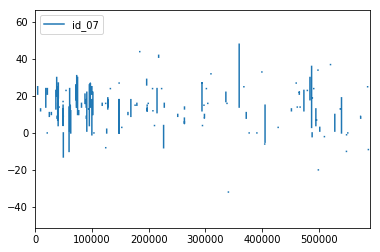

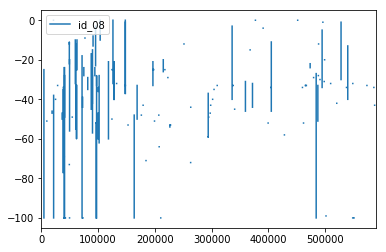

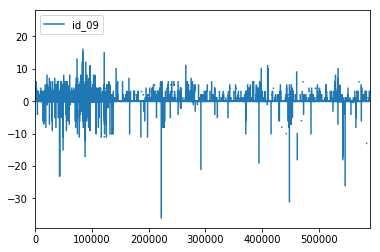

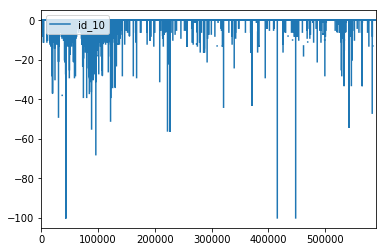

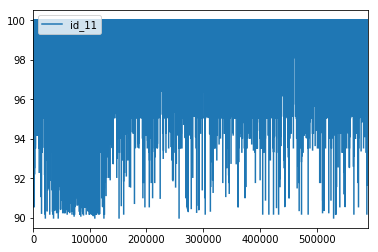

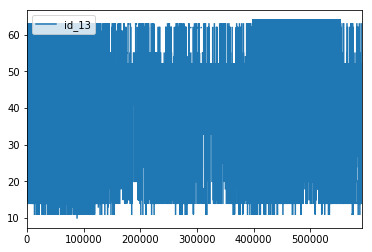

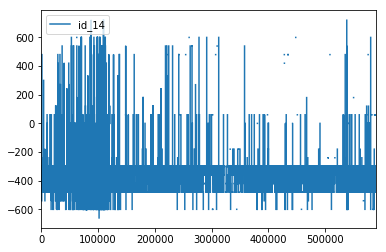

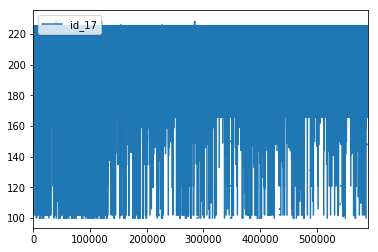

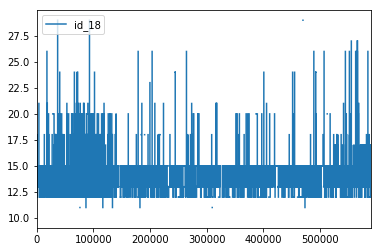

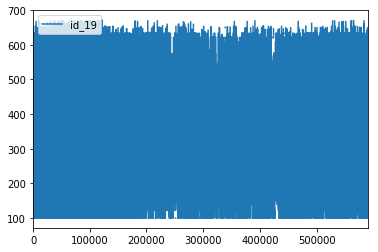

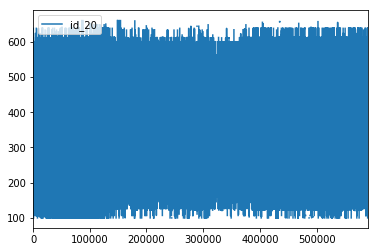

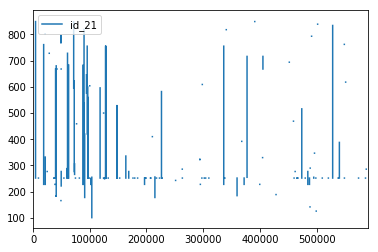

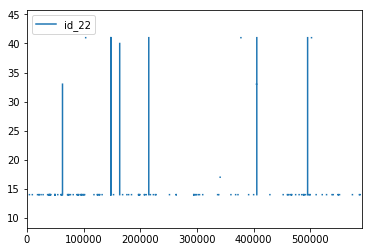

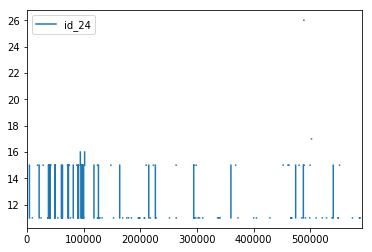

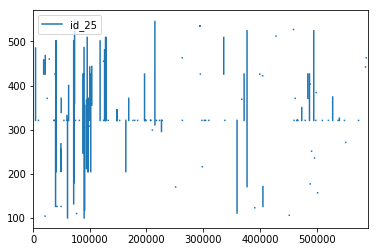

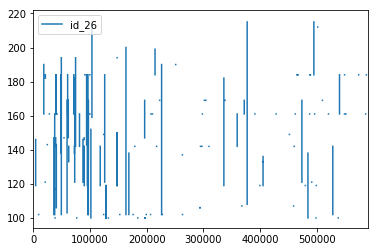

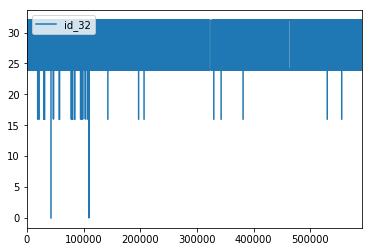

In [51]:
for tmp_column in df_train.columns:
    if df_train[tmp_column].dtype != np.object:
        df_train[tmp_column].plot(kind='line', label=tmp_column)
        plt.legend(loc='upper left')
        plt.show()
    else:
#         df_train[tmp_column].plot(kind='pie', label=tmp_column)
#         plt.legend(loc='upper left')
        pass


 mu = 3282269.50 and sigma = 170474.21


 mu = 0.03 and sigma = 0.18


 mu = 7372311.31 and sigma = 4617219.74


 mu = 135.03 and sigma = 239.16



TypeError: unsupported operand type(s) for /: 'str' and 'int'

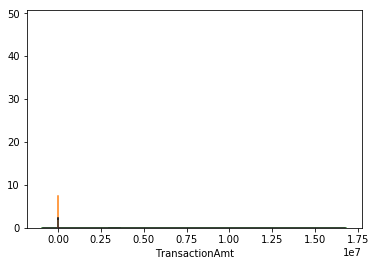

In [33]:
for tmp_field in df_train.columns:
#     print(tmp_field)
#     print(null_df.loc[df_train[tmp_field] == True][tmp_field].count())
#     print("------------------------------------")
    sns.distplot(df_train[tmp_field], fit=norm)
    (mu, sigma) = norm.fit(df_train[tmp_field])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

### 2.2 encode string data

In [0]:
le = LabelEncoder()

structure_with_charges["atom"] = le.fit_transform(structure_with_charges["atom"])
structure_with_charges.head(5)

molecule_name  atom_index  atom         x         y         z  \
0  dsgdb9nsd_000001           0     0 -0.012698  1.085804  0.008001   
1  dsgdb9nsd_000001           1     2  0.002150 -0.006031  0.001976   
2  dsgdb9nsd_000001           2     2  1.011731  1.463751  0.000277   
3  dsgdb9nsd_000001           3     2 -0.540815  1.447527 -0.876644   
4  dsgdb9nsd_000001           4     2 -0.523814  1.437933  0.906397   

   mulliken_charge  
0        -0.535689  
1         0.133921  
2         0.133922  
3         0.133923  
4         0.133923

### 2.3 normalization


In [0]:
def normalization(data_frame, feature_colnmns):
  np_list_train = data_frame[feature_columns].to_numpy()

  for index, tmp_row in enumerate(np_list_train):
    np_list_train[index] = tmp_row / np.linalg.norm(tmp_row, ord=2)
   
  return np_list_train

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1"]
tmp = normalization(training_result, feature_columns)

### 2.4 labelling

In [0]:
type_collection = train["type"].unique()

## *3. model training*

### 3.1 dataset split

In [0]:
def create_validation(partition, trainset, testset):
  return train_test_split(trainset, testset, test_size=partition)

# kfold = StratifiedKFold(n_splits=10, shuffle=True)

### 3.2 training

#### 3.2.1 model selection

##### 3.2.1.1 catboost

In [0]:
from catboost import CatBoostRegressor
learning_rate = [0.1, 0.01, 0.001]
depth = [7, 8, 9]

param_dict = dict(learning_rate=learning_rate, depth=depth)

model = CatBoostRegressor()

##### 3.2.1.2 xgboost


In [0]:
import xgboost as xgb
learning_rate = [0.1, 0.01, 0.001]
n_estimators = [150, 300, 450]
max_depth = [7, 8, 9]

param_dict = dict(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)

model = xgb.XGBRegressor()
gbm = xgb.XGBRegressor(max_depth=3, n_estimators=300, learning_rate=0.05).fit(np_list_train, train_y)

#### 3.2.2 loss function selection

In [0]:
def self_loss(calcul_result, predict_result):
  grad = abs(predict_result - calcul_result)
  hess = np.power(np.abs(grad), 0.5)
  return grad, hess

#### 3.2.3 gridsearch

In [0]:
grid_search = GridSearchCV(model, param_dict)
grid_search.fit(np_list_train, train_y)

In [0]:
print(grid_search.best_score_)
print(grid_search.best_params_)

#### 3.2.4 training

##### 3.2.4.1 mulliken_charges model

In [0]:
structure_with_charges.head(5)

molecule_name  atom_index  atom         x         y         z  \
0  dsgdb9nsd_000001           0     0 -0.012698  1.085804  0.008001   
1  dsgdb9nsd_000001           1     2  0.002150 -0.006031  0.001976   
2  dsgdb9nsd_000001           2     2  1.011731  1.463751  0.000277   
3  dsgdb9nsd_000001           3     2 -0.540815  1.447527 -0.876644   
4  dsgdb9nsd_000001           4     2 -0.523814  1.437933  0.906397   

   mulliken_charge  
0        -0.535689  
1         0.133921  
2         0.133922  
3         0.133923  
4         0.133923

In [0]:
feature_columns = ["atom", "x", "y", "z"]
train_x = normalization(structure_with_charges, feature_columns)
train_y = structure_with_charges["mulliken_charge"]
eval_set = None

In [0]:
train_x, valid_x, train_y, valid_y = create_validation(0.2, train_x, train_y)
eval_set = (valid_x, valid_y)

In [0]:
model_mulliken_charge = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_mulliken_charge.fit(train_x, train_y, eval_set=eval_set,silent=True)

##### 3.2.4.2 1JHC model

In [0]:
tmp_train = training_result.loc[training_result["type"] == "1JHC"]
tmp_train.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  \
0    0  dsgdb9nsd_000001             1             0  1JHC   
1    4  dsgdb9nsd_000001             2             0  1JHC   
2    7  dsgdb9nsd_000001             3             0  1JHC   
3    9  dsgdb9nsd_000001             4             0  1JHC   
17  17  dsgdb9nsd_000005             2             0  1JHC   

    scalar_coupling_constant atom_type_0       x_0       y_0       z_0  \
0                    84.8076           H  0.002150 -0.006031  0.001976   
1                    84.8074           H  1.011731  1.463751  0.000277   
2                    84.8093           H -0.540815  1.447527 -0.876644   
3                    84.8095           H -0.523814  1.437933  0.906397   
17                  171.2200           H -0.027803  2.198949  0.014154   

   atom_type_1       x_1       y_1       z_1        fc        sd       pso  \
0            C -0.012698  1.085804  0.008001   83.0224  0.254579  1.258620   
1            C -0.012698  1.085804  0.008001   83.0222  0.254585  1.258610   
2            C -0.012698  1.085804  0.008001   83.0241  0.254634  1.258560   
3            C -0.012698  1.085804  0.008001   83.0243  0.254628  1.258560   
17           C -0.013324  1.132466  0.008276  170.5060  0.867723 -0.654267   

         dso  mulliken_charge_0  mulliken_charge_1  
0   0.272010           0.133921          -0.535689  
1   0.272013           0.133922          -0.535689  
2   0.272012           0.133923          -0.535689  
3   0.272012           0.133923          -0.535689  
17  0.500900           0.238128          -0.049655

###### 3.2.4.2.1 fc

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1", "mulliken_charge_0", "mulliken_charge_1"]
train_x = normalization(tmp_train, feature_columns)
train_y = tmp_train["fc"]
eval_set = None

In [0]:
model_1JHC_fc = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_1JHC_fc.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.2.2 sd

In [0]:
train_y = tmp_train["sd"]

In [0]:
model_1JHC_sd = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_1JHC_sd.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.2.3 pso

In [0]:
train_y = tmp_train["pso"]

In [0]:
model_1JHC_pso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_1JHC_pso.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.2.4 dso

In [0]:
train_y = tmp_train["dso"]

In [0]:
model_1JHC_dso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_1JHC_dso.fit(train_x, train_y, eval_set=eval_set,silent=True)

##### 3.2.4.3 2JHH model

In [0]:
tmp_train = training_result.loc[training_result["type"] == "2JHH"]
tmp_train.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  \
4   1  dsgdb9nsd_000001             1             2  2JHH   
5   2  dsgdb9nsd_000001             1             3  2JHH   
6   5  dsgdb9nsd_000001             2             3  2JHH   
7   3  dsgdb9nsd_000001             1             4  2JHH   
8   6  dsgdb9nsd_000001             2             4  2JHH   

   scalar_coupling_constant atom_type_0       x_0       y_0       z_0  \
4                  -11.2570           H  0.002150 -0.006031  0.001976   
5                  -11.2548           H  0.002150 -0.006031  0.001976   
6                  -11.2541           H  1.011731  1.463751  0.000277   
7                  -11.2543           H  0.002150 -0.006031  0.001976   
8                  -11.2548           H  1.011731  1.463751  0.000277   

  atom_type_1       x_1       y_1       z_1       fc        sd      pso  \
4           H  1.011731  1.463751  0.000277 -11.0347  0.352978  2.85839   
5           H -0.540815  1.447527 -0.876644 -11.0325  0.352944  2.85852   
6           H -0.540815  1.447527 -0.876644 -11.0317  0.352932  2.85856   
7           H -0.523814  1.437933  0.906397 -11.0319  0.352934  2.85855   
8           H -0.523814  1.437933  0.906397 -11.0324  0.352943  2.85853   

       dso  mulliken_charge_0  mulliken_charge_1  
4 -3.43360           0.133921           0.133922  
5 -3.43387           0.133921           0.133923  
6 -3.43395           0.133922           0.133923  
7 -3.43393           0.133921           0.133923  
8 -3.43387           0.133922           0.133923

###### 3.2.4.3.1 fc

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1", "mulliken_charge_0", "mulliken_charge_1"]
train_x = normalization(tmp_train, feature_columns)
train_y = tmp_train["fc"]
eval_set = None

In [0]:
model_2JHH_fc = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHH_fc.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.3.2 sd

In [0]:
train_y = tmp_train["sd"]

In [0]:
model_2JHH_sd = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHH_sd.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.3.3 pso

In [0]:
train_y = tmp_train["pso"]

In [0]:
model_2JHH_pso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHH_pso.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.3.4 dso

In [0]:
train_y = tmp_train["dso"]

In [0]:
model_2JHH_dso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHH_dso.fit(train_x, train_y, eval_set=eval_set,silent=True)

##### 3.2.4.4 1JHN model

In [0]:
tmp_train = training_result.loc[training_result["type"] == "1JHN"]
tmp_train.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  \
10   10  dsgdb9nsd_000002             1             0  1JHN   
11   13  dsgdb9nsd_000002             2             0  1JHN   
12   15  dsgdb9nsd_000002             3             0  1JHN   
97   97  dsgdb9nsd_000012             3             0  1JHN   
98  101  dsgdb9nsd_000012             4             0  1JHN   

    scalar_coupling_constant atom_type_0       x_0       y_0       z_0  \
10                   32.6889           H  0.017257  0.012545 -0.027377   
11                   32.6891           H  0.915789  1.358745 -0.028758   
12                   32.6905           H -0.520278  1.343532 -0.775543   
97                   55.5252           H  0.825355  1.885049  0.003738   
98                   54.7359           H -0.908377  1.826796  0.018920   

   atom_type_1       x_1       y_1       z_1       fc        sd      pso  \
10           N -0.040426  1.024108  0.062564  30.6116  0.059952  1.94935   
11           N -0.040426  1.024108  0.062564  30.6119  0.059961  1.94935   
12           N -0.040426  1.024108  0.062564  30.6135  0.059939  1.94911   
97           N -0.025900  1.346146  0.008894  53.6945  0.143624  1.48139   
98           N -0.025900  1.346146  0.008894  52.7562  0.175517  1.60638   

         dso  mulliken_charge_0  mulliken_charge_1  
10  0.067923           0.235712          -0.707143  
11  0.067922           0.235712          -0.707143  
12  0.067931           0.235720          -0.707143  
97  0.205708           0.264237          -0.463064  
98  0.197831           0.261710          -0.463064

###### 3.2.4.4.1 fc

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1", "mulliken_charge_0", "mulliken_charge_1"]
train_x = normalization(tmp_train, feature_columns)
train_y = tmp_train["fc"]
eval_set = None

In [0]:
model_1JHN_fc = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_1JHN_fc.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.4.2 sd

In [0]:
train_y = tmp_train["sd"]

In [0]:
model_1JHN_sd = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_1JHN_sd.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.4.3 pso

In [0]:
train_y = tmp_train["pso"]

In [0]:
model_1JHN_pso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_1JHN_pso.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.4.4 dso

In [0]:
train_y = tmp_train["dso"]

In [0]:
model_1JHN_dso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_1JHN_dso.fit(train_x, train_y, eval_set=eval_set,silent=True)

##### 3.2.4.5 2JHN model

In [0]:
tmp_train = training_result.loc[training_result["type"] == "2JHN"]
tmp_train.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  \
18    18  dsgdb9nsd_000005             2             1  2JHN   
99   104  dsgdb9nsd_000012             5             0  2JHN   
391  400  dsgdb9nsd_000032             6             0  2JHN   
392  405  dsgdb9nsd_000032             7             0  2JHN   
689  695  dsgdb9nsd_000049            11             3  2JHN   

     scalar_coupling_constant atom_type_0       x_0       y_0       z_0  \
18                   5.182460           H -0.027803  2.198949  0.014154   
99                  15.513500           H -0.961441 -0.475004  0.008074   
391                  0.633806           H  0.489462 -0.408804 -0.897152   
392                  1.378300           H  0.528272 -0.345333  0.864695   
689                  0.784661           H  0.139759 -0.512543 -2.953893   

    atom_type_1       x_1       y_1       z_1         fc        sd       pso  \
18            N  0.002311 -0.019159  0.001929   2.740550  0.537983  2.341890   
99            N -0.025900  1.346146  0.008894  15.819300  0.017464 -0.214723   
391           N -0.036081  1.487625  0.036781   0.633008 -0.024037  0.140472   
392           N -0.036081  1.487625  0.036781   1.262220 -0.005353  0.196939   
689           N  0.081868 -0.692028 -1.100873   1.198410 -0.079935 -0.243814   

          dso  mulliken_charge_0  mulliken_charge_1  
18  -0.437965           0.238128          -0.188473  
99  -0.108601           0.072245          -0.463064  
391 -0.115638           0.137100          -0.495906  
392 -0.075503           0.160973          -0.495906  
689 -0.090003           0.304600          -0.157798

###### 3.2.4.5.1 fc

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1", "mulliken_charge_0", "mulliken_charge_1"]
train_x = normalization(tmp_train, feature_columns)
train_y = tmp_train["fc"]
eval_set = None

In [0]:
model_2JHN_fc = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHN_fc.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.5.2 sd

In [0]:
train_y = tmp_train["sd"]

In [0]:
model_2JHN_sd = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHN_sd.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.5.3 pso

In [0]:
train_y = tmp_train["pso"]

In [0]:
model_2JHN_pso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHN_pso.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.5.4 dso

In [0]:
train_y = tmp_train["dso"]

In [0]:
model_2JHN_dso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHN_dso.fit(train_x, train_y, eval_set=eval_set,silent=True)

##### 3.2.4.6 2JHC model

In [0]:
tmp_train = training_result.loc[training_result["type"] == "2JHC"]
tmp_train.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  \
22  37  dsgdb9nsd_000007             5             0  2JHC   
23  41  dsgdb9nsd_000007             6             0  2JHC   
24  44  dsgdb9nsd_000007             7             0  2JHC   
25  20  dsgdb9nsd_000007             2             1  2JHC   
26  27  dsgdb9nsd_000007             3             1  2JHC   

    scalar_coupling_constant atom_type_0       x_0       y_0       z_0  \
22                  -2.37876           H  0.525487 -0.401908  0.877544   
23                  -2.37852           H -1.011477 -0.418034  0.009508   
24                  -2.37724           H  0.508626 -0.392470 -0.887601   
25                  -2.37831           H  0.994873  1.939743  0.002941   
26                  -2.37862           H -0.542076  1.923611 -0.865117   

   atom_type_1       x_1       y_1       z_1       fc        sd       pso  \
22           C -0.018704  1.525582  0.010433 -2.42539  0.077478  0.317139   
23           C -0.018704  1.525582  0.010433 -2.42514  0.077474  0.317142   
24           C -0.018704  1.525582  0.010433 -2.42385  0.077461  0.317186   
25           C  0.002104 -0.003882  0.001999 -2.42493  0.077475  0.317149   
26           C  0.002104 -0.003882  0.001999 -2.42525  0.077477  0.317142   

         dso  mulliken_charge_0  mulliken_charge_1  
22 -0.347989           0.115225          -0.345672  
23 -0.347994           0.115222          -0.345672  
24 -0.348032           0.115225          -0.345672  
25 -0.348001           0.115222          -0.345672  
26 -0.347991           0.115225          -0.345672

###### 3.2.4.6.1 fc

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1", "mulliken_charge_0", "mulliken_charge_1"]
train_x = normalization(tmp_train, feature_columns)
train_y = tmp_train["fc"]
eval_set = None

In [0]:
model_2JHC_fc = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHC_fc.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.6.2 sd


In [0]:
train_y = tmp_train["sd"]

In [0]:
model_2JHC_sd = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHC_sd.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.6.3 pso

In [0]:
train_y = tmp_train["pso"]

In [0]:
model_2JHC_pso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHC_pso.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.6.4 dso

In [0]:
train_y = tmp_train["dso"]

In [0]:
model_2JHC_dso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_2JHC_dso.fit(train_x, train_y, eval_set=eval_set,silent=True)

##### 3.2.4.7 3JHH model

In [0]:
tmp_train = training_result.loc[training_result["type"] == "3JHH"]
tmp_train.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  \
34  23  dsgdb9nsd_000007             2             5  3JHH   
35  29  dsgdb9nsd_000007             3             5  3JHH   
36  34  dsgdb9nsd_000007             4             5  3JHH   
37  24  dsgdb9nsd_000007             2             6  3JHH   
38  30  dsgdb9nsd_000007             3             6  3JHH   

    scalar_coupling_constant atom_type_0       x_0       y_0       z_0  \
34                   3.25281           H  0.994873  1.939743  0.002941   
35                  13.69240           H -0.542076  1.923611 -0.865117   
36                   3.25243           H -0.525241  1.914173  0.900024   
37                  13.69130           H  0.994873  1.939743  0.002941   
38                   3.25253           H -0.542076  1.923611 -0.865117   

   atom_type_1       x_1       y_1       z_1        fc        sd       pso  \
34           H  0.525487 -0.401908  0.877544   3.38259  0.063734  0.739016   
35           H  0.525487 -0.401908  0.877544  14.56780  0.025487  2.162600   
36           H  0.525487 -0.401908  0.877544   3.38222  0.063728  0.739028   
37           H -1.011477 -0.418034  0.009508  14.56670  0.025484  2.162610   
38           H -1.011477 -0.418034  0.009508   3.38233  0.063729  0.739035   

         dso  mulliken_charge_0  mulliken_charge_1  
34 -0.932534           0.115222           0.115225  
35 -3.063510           0.115225           0.115225  
36 -0.932550           0.115225           0.115225  
37 -3.063530           0.115222           0.115222  
38 -0.932563           0.115225           0.115222

###### 3.2.4.7.1 fc

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1", "mulliken_charge_0", "mulliken_charge_1"]
train_x = normalization(tmp_train, feature_columns)
train_y = tmp_train["fc"]
eval_set = None

In [0]:
model_3JHH_fc = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHH_fc.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.7.2 sd

In [0]:
train_y = tmp_train["sd"]

In [0]:
model_3JHH_sd = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHH_sd.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.7.3 pso

In [0]:
train_y = tmp_train["pso"]

In [0]:
model_3JHH_pso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHH_pso.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.7.4 dso

In [0]:
train_y = tmp_train["dso"]

In [0]:
model_3JHH_dso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHH_dso.fit(train_x, train_y, eval_set=eval_set,silent=True)

##### 3.2.4.8 3JHC model

In [0]:
tmp_train = training_result.loc[training_result["type"] == "3JHC"]
tmp_train.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  \
59    68  dsgdb9nsd_000009             6             0  3JHC   
64    58  dsgdb9nsd_000009             3             2  3JHC   
65    63  dsgdb9nsd_000009             4             2  3JHC   
66    67  dsgdb9nsd_000009             5             2  3JHC   
111  137  dsgdb9nsd_000013             8             0  3JHC   

     scalar_coupling_constant atom_type_0       x_0       y_0       z_0  \
59                    2.51865           H  0.032317 -2.253148 -0.010260   
64                    4.55166           H  0.997822  1.874253  0.002606   
65                    4.55410           H -0.542204  1.858012 -0.867212   
66                    4.55341           H -0.525333  1.848344  0.901481   
111                   2.51798           H  1.758512 -0.173766 -1.308715   

    atom_type_1       x_1       y_1       z_1       fc        sd       pso  \
59            C -0.017821  1.464358  0.010094  2.52655  0.085995  0.452039   
64            C  0.018341 -1.191805 -0.004505  4.50346 -0.095534  0.645694   
65            C  0.018341 -1.191805 -0.004505  4.50599 -0.095446  0.645498   
66            C  0.018341 -1.191805 -0.004505  4.50539 -0.095391  0.645287   
111           C -0.031138  1.540816  0.031921  2.55415 -0.028365  0.057605   

          dso  mulliken_charge_0  mulliken_charge_1  
59  -0.545933           0.196182          -0.493018  
64  -0.501970           0.151087          -0.443025  
65  -0.501940           0.151092          -0.443025  
66  -0.501876           0.151097          -0.443025  
111 -0.065410           0.112009          -0.357354

###### 3.2.4.8.1 fc

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1", "mulliken_charge_0", "mulliken_charge_1"]
train_x = normalization(tmp_train, feature_columns)
train_y = tmp_train["fc"]
eval_set = None

In [0]:
model_3JHC_fc = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHC_fc.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.8.2 sd

In [0]:
train_y = tmp_train["sd"]

In [0]:
model_3JHC_sd = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHC_sd.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.8.3 pso

In [0]:
train_y = tmp_train["pso"]

In [0]:
model_3JHC_pso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHC_pso.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.8.4 dso

In [0]:
train_y = tmp_train["dso"]

In [0]:
model_3JHC_dso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHC_dso.fit(train_x, train_y, eval_set=eval_set,silent=True)

##### 3.2.4.9 3JHN model

In [0]:
tmp_train = training_result.loc[training_result["type"] == "3JHN"]
tmp_train.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  \
77    73  dsgdb9nsd_000010             3             2  3JHN   
78    78  dsgdb9nsd_000010             4             2  3JHN   
79    82  dsgdb9nsd_000010             5             2  3JHN   
221  213  dsgdb9nsd_000019             4             2  3JHN   
222  218  dsgdb9nsd_000019             5             2  3JHN   

     scalar_coupling_constant atom_type_0       x_0       y_0       z_0  \
77                   0.880802           H  1.002029  1.860899  0.002454   
78                   0.880957           H -0.543988  1.844799 -0.870755   
79                   0.880871           H -0.527078  1.835182  0.904863   
221                 -0.052074           H  0.913903  1.929238 -0.461001   
222                  1.611320           H -0.870809  1.911242 -0.523452   

    atom_type_1       x_1       y_1       z_1        fc        sd       pso  \
77            N  0.017652 -1.144529 -0.004204  0.846380 -0.029237  0.225825   
78            N  0.017652 -1.144529 -0.004204  0.846343 -0.029285  0.226104   
79            N  0.017652 -1.144529 -0.004204  0.846297 -0.029273  0.226041   
221           N  1.178267 -0.633243  0.056917 -0.025345 -0.016761 -0.011531   
222           N  1.178267 -0.633243  0.056917  1.663340  0.006496  0.092233   

          dso  mulliken_charge_0  mulliken_charge_1  
77  -0.162166           0.176340          -0.285473  
78  -0.162205           0.176328          -0.285473  
79  -0.162194           0.176329          -0.285473  
221  0.001564           0.125842          -0.504896  
222 -0.150746           0.152191          -0.504896

###### 3.2.4.9.1 fc

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1", "mulliken_charge_0", "mulliken_charge_1"]
train_x = normalization(tmp_train, feature_columns)
train_y = tmp_train["fc"]
eval_set = None

In [0]:
model_3JHN_fc = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHN_fc.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.9.2 sd

In [0]:
train_y = tmp_train["sd"]

In [0]:
model_3JHN_sd = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHN_sd.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.9.3 pso

In [0]:
train_y = tmp_train["pso"]

In [0]:
model_3JHN_pso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHN_pso.fit(train_x, train_y, eval_set=eval_set,silent=True)

###### 3.2.4.9.4 dso

In [0]:
train_y = tmp_train["dso"]

In [0]:
model_3JHN_dso = CatBoostRegressor(learning_rate=0.001, logging_level='Verbose',iterations=10000, depth=7)
model_3JHN_dso.fit(train_x, train_y, eval_set=eval_set,silent=True)

### 3.3 validation

the evaluation function: $score = \frac{1}{T}\sum_{t=1}^{T}log(\frac{1}{n_t}\sum_{i=1}^{n_t}\|y_i - y_i^*\|)$

## *4. evaluation*

In [0]:
structure_with_charges.head(5)

molecule_name  atom_index  atom         x         y         z  \
0  dsgdb9nsd_000001           0     0 -0.012698  1.085804  0.008001   
1  dsgdb9nsd_000001           1     2  0.002150 -0.006031  0.001976   
2  dsgdb9nsd_000001           2     2  1.011731  1.463751  0.000277   
3  dsgdb9nsd_000001           3     2 -0.540815  1.447527 -0.876644   
4  dsgdb9nsd_000001           4     2 -0.523814  1.437933  0.906397   

   mulliken_charge  
0        -0.535689  
1         0.133921  
2         0.133922  
3         0.133923  
4         0.133923

In [0]:
test_set.head(5)

id     molecule_name  atom_index_0  atom_index_1  type
0  4658147  dsgdb9nsd_000004             2             0  2JHC
1  4658148  dsgdb9nsd_000004             2             1  1JHC
2  4658149  dsgdb9nsd_000004             2             3  3JHH
3  4658150  dsgdb9nsd_000004             3             0  1JHC
4  4658151  dsgdb9nsd_000004             3             1  2JHC

In [0]:
tmp_structure = structures_set.rename(columns={"atom_index": "atom_index_0"})
tmp_structure.head(5)

molecule_name  atom_index_0 atom         x         y         z
0  dsgdb9nsd_000001             0    C -0.012698  1.085804  0.008001
1  dsgdb9nsd_000001             1    H  0.002150 -0.006031  0.001976
2  dsgdb9nsd_000001             2    H  1.011731  1.463751  0.000277
3  dsgdb9nsd_000001             3    H -0.540815  1.447527 -0.876644
4  dsgdb9nsd_000001             4    H -0.523814  1.437933  0.906397

In [0]:
test_with_structure = pd.merge(test_set, tmp_structure, on=['molecule_name', 'atom_index_0'])
test_with_structure = test_with_structure.rename(columns={"x": "x_0", "y": "y_0", "z": "z_0"})
test_with_structure.head(5)

id     molecule_name  atom_index_0  atom_index_1  type atom       x_0  \
0  4658147  dsgdb9nsd_000004             2             0  2JHC    H -1.661639   
1  4658148  dsgdb9nsd_000004             2             1  1JHC    H -1.661639   
2  4658149  dsgdb9nsd_000004             2             3  3JHH    H -1.661639   
3  4658150  dsgdb9nsd_000004             3             0  1JHC    H  1.661639   
4  4658151  dsgdb9nsd_000004             3             1  2JHC    H  1.661639   

   y_0  z_0  
0  0.0  1.0  
1  0.0  1.0  
2  0.0  1.0  
3  0.0  1.0  
4  0.0  1.0

In [0]:
tmp_structure = tmp_structure.rename(columns={"atom_index_0": "atom_index_1"})
tmp_structure.head(5)

molecule_name  atom_index_1 atom         x         y         z
0  dsgdb9nsd_000001             0    C -0.012698  1.085804  0.008001
1  dsgdb9nsd_000001             1    H  0.002150 -0.006031  0.001976
2  dsgdb9nsd_000001             2    H  1.011731  1.463751  0.000277
3  dsgdb9nsd_000001             3    H -0.540815  1.447527 -0.876644
4  dsgdb9nsd_000001             4    H -0.523814  1.437933  0.906397

In [0]:
test_with_structure = pd.merge(test_with_structure, tmp_structure, on=['molecule_name', 'atom_index_1'])
test_with_structure = test_with_structure.rename(columns={"x": "x_1", "y": "y_1", "z": "z_1"})
test_with_structure.head(5)

id     molecule_name  atom_index_0  atom_index_1  type atom_x  \
0  4658147  dsgdb9nsd_000004             2             0  2JHC      H   
1  4658150  dsgdb9nsd_000004             3             0  1JHC      H   
2  4658148  dsgdb9nsd_000004             2             1  1JHC      H   
3  4658151  dsgdb9nsd_000004             3             1  2JHC      H   
4  4658149  dsgdb9nsd_000004             2             3  3JHH      H   

        x_0  y_0  z_0 atom_y       x_1  y_1  z_1  
0 -1.661639  0.0  1.0      C  0.599539  0.0  1.0  
1  1.661639  0.0  1.0      C  0.599539  0.0  1.0  
2 -1.661639  0.0  1.0      C -0.599539  0.0  1.0  
3  1.661639  0.0  1.0      C -0.599539  0.0  1.0  
4 -1.661639  0.0  1.0      H  1.661639  0.0  1.0

In [0]:
test_with_structure["atom_x"] = le.fit_transform(test_with_structure["atom_x"])
test_with_structure["atom_y"] = le.fit_transform(test_with_structure["atom_y"])

In [0]:
test_with_structure.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  atom_x  \
0  4658147  dsgdb9nsd_000004             2             0  2JHC       0   
1  4658150  dsgdb9nsd_000004             3             0  1JHC       0   
2  4658148  dsgdb9nsd_000004             2             1  1JHC       0   
3  4658151  dsgdb9nsd_000004             3             1  2JHC       0   
4  4658149  dsgdb9nsd_000004             2             3  3JHH       0   

        x_0  y_0  z_0  atom_y       x_1  y_1  z_1  
0 -1.661639  0.0  1.0       0  0.599539  0.0  1.0  
1  1.661639  0.0  1.0       0  0.599539  0.0  1.0  
2 -1.661639  0.0  1.0       0 -0.599539  0.0  1.0  
3  1.661639  0.0  1.0       0 -0.599539  0.0  1.0  
4 -1.661639  0.0  1.0       1  1.661639  0.0  1.0

In [0]:
feature_columns = ["atom_x", "x_0", "y_0", "z_0"]
tmp_test = normalization(test_with_structure, feature_columns)
charge_0 = model_mulliken_charge.predict(tmp_test)

In [0]:
feature_columns = ["atom_y", "x_1", "y_1", "z_1"]
tmp_test = normalization(test_with_structure, feature_columns)
charge_1 = model_mulliken_charge.predict(tmp_test)

In [0]:
test_with_structure["charge_0"] = charge_0
test_with_structure["charge_1"] = charge_1

In [0]:
test_with_structure.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  atom_x  \
0  4658147  dsgdb9nsd_000004             2             0  2JHC       0   
1  4658150  dsgdb9nsd_000004             3             0  1JHC       0   
2  4658148  dsgdb9nsd_000004             2             1  1JHC       0   
3  4658151  dsgdb9nsd_000004             3             1  2JHC       0   
4  4658149  dsgdb9nsd_000004             2             3  3JHH       0   

        x_0  y_0  z_0  atom_y       x_1  y_1  z_1  charge_0  charge_1  
0 -1.661639  0.0  1.0       0  0.599539  0.0  1.0 -0.048795 -0.053369  
1  1.661639  0.0  1.0       0  0.599539  0.0  1.0 -0.040900 -0.053369  
2 -1.661639  0.0  1.0       0 -0.599539  0.0  1.0 -0.048795 -0.026151  
3  1.661639  0.0  1.0       0 -0.599539  0.0  1.0 -0.040900 -0.026151  
4 -1.661639  0.0  1.0       1  1.661639  0.0  1.0 -0.048795  0.120047

In [0]:
test_with_structure.count()

id               2505542
molecule_name    2505542
atom_index_0     2505542
atom_index_1     2505542
type             2505542
atom_x           2505542
x_0              2505542
y_0              2505542
z_0              2505542
atom_y           2505542
x_1              2505542
y_1              2505542
z_1              2505542
charge_0         2505542
charge_1         2505542
dtype: int64

In [0]:
feature_columns = ["x_0", "y_0", "z_0", "x_1", "y_1", "z_1", "charge_0", "charge_1"]

In [0]:
tmp_test = test_with_structure.loc[test_with_structure["type"] == "1JHC"]
tmp_test = normalization(tmp_test, feature_columns)

predictsions_1JHC_fc = model_1JHC_fc.predict(tmp_test)
predictsions_1JHC_sd = model_1JHC_sd.predict(tmp_test)
predictsions_1JHC_pso = model_1JHC_pso.predict(tmp_test)
predictsions_1JHC_dso = model_1JHC_dso.predict(tmp_test)

In [0]:
sc_1JHC = predictsions_1JHC_fc + predictsions_1JHC_sd + predictsions_1JHC_pso + predictsions_1JHC_dso

In [0]:
tmp_test = test_with_structure.loc[test_with_structure["type"] == "2JHH"]
tmp_test = normalization(tmp_test, feature_columns)

predictsions_2JHH_fc = model_2JHH_fc.predict(tmp_test)
predictsions_2JHH_sd = model_2JHH_sd.predict(tmp_test)
predictsions_2JHH_pso = model_2JHH_pso.predict(tmp_test)
predictsions_2JHH_dso = model_2JHH_dso.predict(tmp_test)

In [0]:
sc_2JHH = predictsions_2JHH_fc + predictsions_2JHH_sd + predictsions_2JHH_pso + predictsions_2JHH_dso

In [0]:
tmp_test = test_with_structure.loc[test_with_structure["type"] == "1JHN"]
tmp_test = normalization(tmp_test, feature_columns)

predictsions_1JHN_fc = model_1JHN_fc.predict(tmp_test)
predictsions_1JHN_sd = model_1JHN_sd.predict(tmp_test)
predictsions_1JHN_pso = model_1JHN_pso.predict(tmp_test)
predictsions_1JHN_dso = model_1JHN_dso.predict(tmp_test)

In [0]:
sc_1JHN = predictsions_1JHN_fc + predictsions_1JHN_sd + predictsions_1JHN_pso + predictsions_1JHN_dso

In [0]:
tmp_test = test_with_structure.loc[test_with_structure["type"] == "2JHN"]
tmp_test = normalization(tmp_test, feature_columns)

predictsions_2JHN_fc = model_2JHN_fc.predict(tmp_test)
predictsions_2JHN_sd = model_2JHN_sd.predict(tmp_test)
predictsions_2JHN_pso = model_2JHN_pso.predict(tmp_test)
predictsions_2JHN_dso = model_2JHN_dso.predict(tmp_test)

In [0]:
sc_2JHN = predictsions_2JHN_fc + predictsions_2JHN_sd + predictsions_2JHN_pso + predictsions_2JHN_dso

In [0]:
tmp_test = test_with_structure.loc[test_with_structure["type"] == "2JHC"]
tmp_test = normalization(tmp_test, feature_columns)

predictsions_2JHC_fc = model_2JHC_fc.predict(tmp_test)
predictsions_2JHC_sd = model_2JHC_sd.predict(tmp_test)
predictsions_2JHC_pso = model_2JHC_pso.predict(tmp_test)
predictsions_2JHC_dso = model_2JHC_dso.predict(tmp_test)

In [0]:
sc_2JHC = predictsions_2JHC_fc + predictsions_2JHC_sd + predictsions_2JHC_pso + predictsions_2JHC_dso

In [0]:
tmp_test = test_with_structure.loc[test_with_structure["type"] == "3JHH"]
tmp_test = normalization(tmp_test, feature_columns)

predictsions_3JHH_fc = model_3JHH_fc.predict(tmp_test)
predictsions_3JHH_sd = model_3JHH_sd.predict(tmp_test)
predictsions_3JHH_pso = model_3JHH_pso.predict(tmp_test)
predictsions_3JHH_dso = model_3JHH_dso.predict(tmp_test)

In [0]:
sc_3JHH = predictsions_3JHH_fc + predictsions_3JHH_sd + predictsions_3JHH_pso + predictsions_3JHH_dso

In [0]:
tmp_test = test_with_structure.loc[test_with_structure["type"] == "3JHC"]
tmp_test = normalization(tmp_test, feature_columns)

predictsions_3JHC_fc = model_3JHC_fc.predict(tmp_test)
predictsions_3JHC_sd = model_3JHC_sd.predict(tmp_test)
predictsions_3JHC_pso = model_3JHC_pso.predict(tmp_test)
predictsions_3JHC_dso = model_3JHC_dso.predict(tmp_test)

In [0]:
sc_3JHC = predictsions_3JHC_fc + predictsions_3JHC_sd + predictsions_3JHC_pso + predictsions_3JHC_dso

In [0]:
tmp_test = test_with_structure.loc[test_with_structure["type"] == "3JHN"]
tmp_test = normalization(tmp_test, feature_columns)

predictsions_3JHN_fc = model_3JHN_fc.predict(tmp_test)
predictsions_3JHN_sd = model_3JHN_sd.predict(tmp_test)
predictsions_3JHN_pso = model_3JHN_pso.predict(tmp_test)
predictsions_3JHN_dso = model_3JHN_dso.predict(tmp_test)

In [0]:
sc_3JHN = predictsions_3JHN_fc + predictsions_3JHN_sd + predictsions_3JHN_pso + predictsions_3JHN_dso

In [0]:
tmp_0 = test_with_structure.loc[test_with_structure["type"] == "1JHC"]
tmp_0["sc"] = sc_1JHC

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
tmp_1 = test_with_structure.loc[test_with_structure["type"] == "2JHH"]
tmp_1["sc"] = sc_2JHH

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
tmp_2 = test_with_structure.loc[test_with_structure["type"] == "1JHN"]
tmp_2["sc"] = sc_1JHN

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
tmp_3 = test_with_structure.loc[test_with_structure["type"] == "2JHN"]
tmp_3["sc"] = sc_2JHN

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
tmp_4 = test_with_structure.loc[test_with_structure["type"] == "2JHC"]
tmp_4["sc"] = sc_2JHC

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
tmp_5 = test_with_structure.loc[test_with_structure["type"] == "3JHH"]
tmp_5["sc"] = sc_3JHH

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
tmp_6 = test_with_structure.loc[test_with_structure["type"] == "3JHC"]
tmp_6["sc"] = sc_3JHC

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
tmp_7 = test_with_structure.loc[test_with_structure["type"] == "3JHN"]
tmp_7["sc"] = sc_3JHN

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
tmp_ = tmp_0.append(tmp_1)
tmp_ = tmp_.append(tmp_2)
tmp_ = tmp_.append(tmp_3)
tmp_ = tmp_.append(tmp_4)
tmp_ = tmp_.append(tmp_5)
tmp_ = tmp_.append(tmp_6)
tmp_ = tmp_.append(tmp_7)

In [0]:
tmp_["id"].count()

2505542

In [0]:
tmp_.head(5)

id     molecule_name  atom_index_0  atom_index_1  type  atom_x  \
1  4658150  dsgdb9nsd_000004             3             0  1JHC       0   
2  4658148  dsgdb9nsd_000004             2             1  1JHC       0   
5  4658152  dsgdb9nsd_000015             3             0  1JHC       0   
6  4658156  dsgdb9nsd_000015             4             0  1JHC       0   
7  4658159  dsgdb9nsd_000015             5             0  1JHC       0   

        x_0       y_0       z_0  atom_y       x_1       y_1       z_1  \
1  1.661639  0.000000  1.000000       0  0.599539  0.000000  1.000000   
2 -1.661639  0.000000  1.000000       0 -0.599539  0.000000  1.000000   
5  1.005284  1.810158  0.004656       0 -0.014821  1.392412  0.005671   
6 -0.546896  1.793435 -0.872511       0 -0.014821  1.392412  0.005671   
7 -0.530029  1.722920  0.911017       0 -0.014821  1.392412  0.005671   

   charge_0  charge_1         sc  
1 -0.040900 -0.053369  89.644221  
2 -0.048795 -0.026151  95.315420  
5 -0.042129 -0.219747  89.533312  
6 -0.097130 -0.219747  78.314108  
7 -0.105076 -0.219747  78.700374

In [0]:
tmp_submission = pd.merge(test_with_structure, tmp_, on=["id"])
tmp_submission.head(5)

id   molecule_name_x  atom_index_0_x  atom_index_1_x type_x  atom_x_x  \
0  4658147  dsgdb9nsd_000004               2               0   2JHC         0   
1  4658150  dsgdb9nsd_000004               3               0   1JHC         0   
2  4658148  dsgdb9nsd_000004               2               1   1JHC         0   
3  4658151  dsgdb9nsd_000004               3               1   2JHC         0   
4  4658149  dsgdb9nsd_000004               2               3   3JHH         0   

      x_0_x  y_0_x  z_0_x  atom_y_x  ...     x_0_y  y_0_y  z_0_y  atom_y_y  \
0 -1.661639    0.0    1.0         0  ... -1.661639    0.0    1.0         0   
1  1.661639    0.0    1.0         0  ...  1.661639    0.0    1.0         0   
2 -1.661639    0.0    1.0         0  ... -1.661639    0.0    1.0         0   
3  1.661639    0.0    1.0         0  ...  1.661639    0.0    1.0         0   
4 -1.661639    0.0    1.0         1  ... -1.661639    0.0    1.0         1   

      x_1_y y_1_y  z_1_y  charge_0_y charge_1_y         sc  
0  0.599539   0.0    1.0   -0.048795  -0.053369   3.642698  
1  0.599539   0.0    1.0   -0.040900  -0.053369  89.644221  
2 -0.599539   0.0    1.0   -0.048795  -0.026151  95.315420  
3 -0.599539   0.0    1.0   -0.040900  -0.026151   2.307746  
4  1.661639   0.0    1.0   -0.048795   0.120047   3.310342  

[5 rows x 30 columns]

In [0]:
submission = pd.DataFrame({ 'id': tmp_submission["id"],
                            'scalar_coupling_constant': tmp_submission["sc"]})

In [0]:
submission.to_csv("submission_all_day.csv", index=False)